In [2]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
import datetime

from src.data_preparation import mdl_dataset_prep as dataset_prep

import src.utils.load_config as load_config
import src.data_preparation.load_data as load_data
from src.feature_extraction import extract_pca

from src.utils import modif_plot
import src.visualization.visualize_pca as visualize_pca
from src.visualization import visualize_sit_corr as vsc
from src.feature_extraction import baseline
from src.modelling import sit_corrected
from src.visualization import mdl_ypred_PCA


from src.utils import tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [3]:
from importlib import reload

In [4]:
reload(sit_corrected)

<module 'src.modelling.sit_corrected' from '/users/edelleo1/tardis/tardis-ml/src/modelling/sit_corrected.py'>

In [5]:
# ------------------------------------------------
## Retrieving results from ML
# ------------------------------------------------


## LSTM model
irootdir = rootdir
#ipath = 'Leo/results/lstm_221214-133340/'
# ipath = 'Leo/results/lstm_230201-112355/'
# ipath = 'Leo/results/lstm_230315-010148/'
# ipath = 'Leo/results/lstm_230601-141152/'

# ipath = 'Leo/results/lstm_230904-170405/'
ipath = 'Leo/results/lstm_230919-170402/'
ipath = 'Leo/results/lstm_231006-185645/'



# ipath = 'Leo/results/lstm_230523-163358/'
# ipath = 'Leo/results/lstm_230524-114319/'

ipath = 'Leo/results/lstm_240130-173040/'


ipath = 'Leo/results/lstm_240405-180331/'  # adjSIC full opti1


ml_name ='LSTM3_bk'



# ------------------------------------------------

# file_config = f'{irootdir}{ipath}data_proc_full.yaml'

# get ml_dir and target_field
# nosit_dir, withsit_dir, _, forcing_bdir, pca_dir, res_dir, fig_dir, ml_dir, _ = load_config.load_filename(file_config, verbose=True)
# timeofday, target_field, forcing_fields, covar_fields, lim_idm, lim_jdm, n_comp = load_config.load_config_params(file_config)

ifile = f"{irootdir}{ipath}"

# ------------------------------------------------
## Reconstruct SIT values 
# ------------------------------------------------


s1 = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

print('\nReconstructing SIT...')
s1.reconstruct_sit()

## s1.save_sit()

s1.compute_rmse()
# s1.compute_bias()
# s1.compute_mean(sit_min=None)


# s1.compute_corr()   # add correlation 

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Config file updated 'needpast': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Config file updated 'needfutur': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Folder: Leo/results/lstm_240405-180331/figures/sit_reconstruct/

Initialisation SIT from LSTM3_bk
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/ml/ypred_LSTM3_bk_2011_2022.nc

Reconstructing SIT...
Size of the test:976
Average of the corrected model error: 0.24
Average of the model error reconstruction (lower bound): 0.21
Average of the baseline error correction (upper bound): 0.30


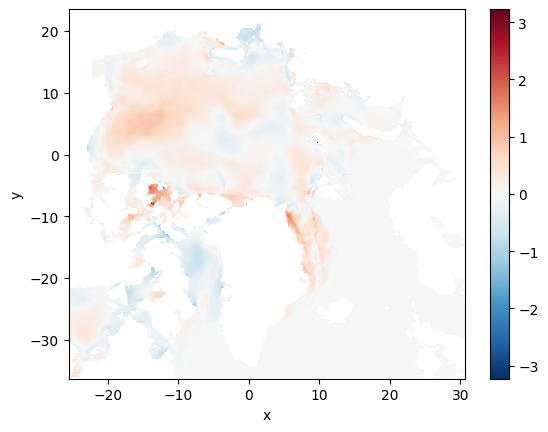

In [12]:
(s1.Xc.isel(time=0) - s1.Xe.isel(time=0)).plot()

In [13]:
from importlib import reload

In [16]:
reload(vsc)

<module 'src.visualization.visualize_sit_corr' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_sit_corr.py'>

In [17]:
day = datetime.datetime(2011,2,15)
vsc.draw_bias_diff(s1, day=day, target_field='sithick', rootdir=s1.config.rootdir, fig_dir=s1.config.fig_dir, savefig=True, showfig=False)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/figures/sithick_error_ML_TOPAZ_diff.png


In [ ]:
# ------------------------------------------------
## Retrieving results from ML
# ------------------------------------------------


## LSTM model
irootdir = rootdir
#ipath = 'Leo/results/lstm_221214-133340/'
# ipath = 'Leo/results/lstm_230201-112355/'
# ipath = 'Leo/results/lstm_230315-010148/'
# ipath = 'Leo/results/lstm_230601-141152/'

# ipath = 'Leo/results/lstm_230904-170405/'
# ipath = 'Leo/results/lstm_230919-170402/'
# ipath = 'Leo/results/lstm_231006-185645/'
ipath = 'Leo/results/lstm_231212-183758/'  # var4



# ipath = 'Leo/results/lstm_230523-163358/'
# ipath = 'Leo/results/lstm_230524-114319/'
ml_name ='LSTM3_bk'



# ------------------------------------------------

# file_config = f'{irootdir}{ipath}data_proc_full.yaml'

# get ml_dir and target_field
# nosit_dir, withsit_dir, _, forcing_bdir, pca_dir, res_dir, fig_dir, ml_dir, _ = load_config.load_filename(file_config, verbose=True)
# timeofday, target_field, forcing_fields, covar_fields, lim_idm, lim_jdm, n_comp = load_config.load_config_params(file_config)

ifile = f"{irootdir}{ipath}"

# ------------------------------------------------
## Reconstruct SIT values 
# ------------------------------------------------


s1 = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1, objective='apply')

print('\nReconstructing SIT...')
s1.reconstruct_sit()

## s1.save_sit()

# s1.compute_rmse()
# s1.compute_bias()
# s1.compute_mean(sit_min=None)


# s1.compute_corr()   # add correlation 

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_231212-183758/config_var4.yaml
Folder: Leo/results/lstm_231212-183758/figures/sit_reconstruct/

Initialisation SIT from LSTM3_bk


In [13]:
s1.sit_na

<xarray.DataArray 'sithick' (time: 4565, y: 479, x: 450)>
[983985750 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1998-10-01 1998-10-02 ... 2011-03-31
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
  * x          (x) float32 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * y          (y) float32 -36.25 -36.12 -36.0 -35.88 ... 23.12 23.25 23.38 23.5
Attributes:
    cell_methods:   area: mean where sea_ice
    grid_mapping:   stereographic
    standard_name:  sea_ice_thickness
    units:          m

In [12]:
s1.Xc.time

<xarray.DataArray 'time' (time: 2696)>
array(['1991-10-01T00:00:00.000000000', '1991-10-02T00:00:00.000000000',
       '1991-10-03T00:00:00.000000000', ..., '1999-02-14T00:00:00.000000000',
       '1999-02-15T00:00:00.000000000', '1999-02-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-10-01 1991-10-02 ... 1999-02-16

In [10]:
s1.sit.time

<xarray.DataArray 'time' (time: 139)>
array(['1998-10-01T00:00:00.000000000', '1998-10-02T00:00:00.000000000',
       '1998-10-03T00:00:00.000000000', '1998-10-04T00:00:00.000000000',
       '1998-10-05T00:00:00.000000000', '1998-10-06T00:00:00.000000000',
       '1998-10-07T00:00:00.000000000', '1998-10-08T00:00:00.000000000',
       '1998-10-09T00:00:00.000000000', '1998-10-10T00:00:00.000000000',
       '1998-10-11T00:00:00.000000000', '1998-10-12T00:00:00.000000000',
       '1998-10-13T00:00:00.000000000', '1998-10-14T00:00:00.000000000',
       '1998-10-15T00:00:00.000000000', '1998-10-16T00:00:00.000000000',
       '1998-10-17T00:00:00.000000000', '1998-10-18T00:00:00.000000000',
       '1998-10-19T00:00:00.000000000', '1998-10-20T00:00:00.000000000',
       '1998-10-21T00:00:00.000000000', '1998-10-22T00:00:00.000000000',
       '1998-10-23T00:00:00.000000000', '1998-10-24T00:00:00.000000000',
       '1998-10-25T00:00:00.000000000', '1998-10-26T00:00:00.000000000',
       '1998-10-27T00:00:00.000000000', '1998-10-28T00:00:00.000000000',
       '1998-10-29T00:00:00.000000000', '1998-10-30T00:00:00.000000000',
       '1998-10-31T00:00:00.000000000', '1998-11-01T00:00:00.000000000',
       '1998-11-02T00:00:00.000000000', '1998-11-03T00:00:00.000000000',
       '1998-11-04T00:00:00.000000000', '1998-11-05T00:00:00.000000000',
       '1998-11-06T00:00:00.000000000', '1998-11-07T00:00:00.000000000',
       '1998-11-08T00:00:00.000000000', '1998-11-09T00:00:00.000000000',
       '1998-11-10T00:00:00.000000000', '1998-11-11T00:00:00.000000000',
       '1998-11-12T00:00:00.000000000', '1998-11-13T00:00:00.000000000',
       '1998-11-14T00:00:00.000000000', '1998-11-15T00:00:00.000000000',
       '1998-11-16T00:00:00.000000000', '1998-11-17T00:00:00.000000000',
       '1998-11-18T00:00:00.000000000', '1998-11-19T00:00:00.000000000',
       '1998-11-20T00:00:00.000000000', '1998-11-21T00:00:00.000000000',
       '1998-11-22T00:00:00.000000000', '1998-11-23T00:00:00.000000000',
       '1998-11-24T00:00:00.000000000', '1998-11-25T00:00:00.000000000',
       '1998-11-26T00:00:00.000000000', '1998-11-27T00:00:00.000000000',
       '1998-11-28T00:00:00.000000000', '1998-11-29T00:00:00.000000000',
       '1998-11-30T00:00:00.000000000', '1998-12-01T00:00:00.000000000',
       '1998-12-02T00:00:00.000000000', '1998-12-03T00:00:00.000000000',
       '1998-12-04T00:00:00.000000000', '1998-12-05T00:00:00.000000000',
       '1998-12-06T00:00:00.000000000', '1998-12-07T00:00:00.000000000',
       '1998-12-08T00:00:00.000000000', '1998-12-09T00:00:00.000000000',
       '1998-12-10T00:00:00.000000000', '1998-12-11T00:00:00.000000000',
       '1998-12-12T00:00:00.000000000', '1998-12-13T00:00:00.000000000',
       '1998-12-14T00:00:00.000000000', '1998-12-15T00:00:00.000000000',
       '1998-12-16T00:00:00.000000000', '1998-12-17T00:00:00.000000000',
       '1998-12-18T00:00:00.000000000', '1998-12-19T00:00:00.000000000',
       '1998-12-20T00:00:00.000000000', '1998-12-21T00:00:00.000000000',
       '1998-12-22T00:00:00.000000000', '1998-12-23T00:00:00.000000000',
       '1998-12-24T00:00:00.000000000', '1998-12-25T00:00:00.000000000',
       '1998-12-26T00:00:00.000000000', '1998-12-27T00:00:00.000000000',
       '1998-12-28T00:00:00.000000000', '1998-12-29T00:00:00.000000000',
       '1998-12-30T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '1999-01-02T00:00:00.000000000',
       '1999-01-03T00:00:00.000000000', '1999-01-04T00:00:00.000000000',
       '1999-01-05T00:00:00.000000000', '1999-01-06T00:00:00.000000000',
       '1999-01-07T00:00:00.000000000', '1999-01-08T00:00:00.000000000',
       '1999-01-09T00:00:00.000000000', '1999-01-10T00:00:00.000000000',
       '1999-01-11T00:00:00.000000000', '1999-01-12T00:00:00.000000000',
       '1999-01-13T00:00:00.000000000', '1999-01-14T00:00:00.000000000',
       '1999-01-15T00:00:00.000000000', '1999-01-16T00:00:00.000000000',
       '1999-01-17T0

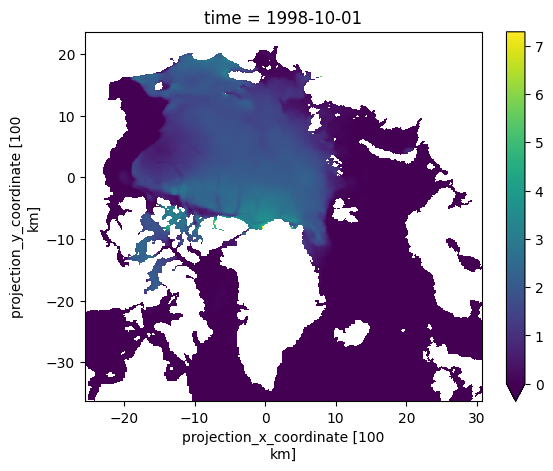

In [9]:
s1.sit.isel(time=0).plot(vmin=0)

# ---------------------

In [5]:
# 2d correlation

In [6]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html

In [5]:
sit_a = s1.sit_a.isel(time=slice(None,1096))  # .mean(('time'))

In [6]:
sit_na = s1.sit_na.isel(time=slice(None,1096))  # .mean(('time'))

In [7]:
sit_ml =  s1.sit.isel(time=slice(None,1096))  # .mean(('time'))

In [8]:
sit_bl = s1.sit_bl.isel(time=slice(None,1096))  # .mean(('time'))

In [ ]:
# Reshape to 1D, drop nan, then compute correlation
# would be equivalent to spatial correlation (?)

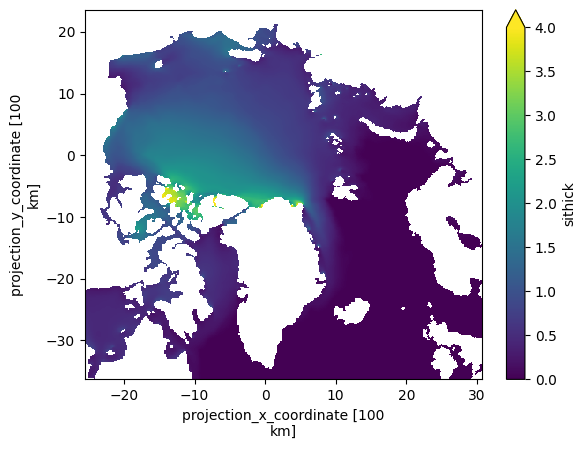

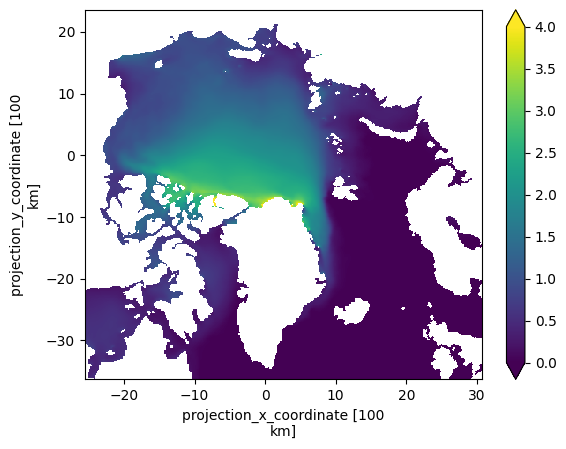

In [12]:
sit_nam.plot(vmax=4, vmin=0)
plt.show()

sit_ml.plot(vmax=4, vmin=0)

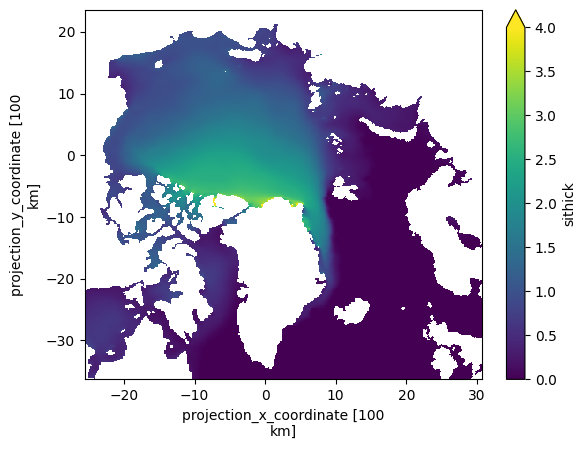

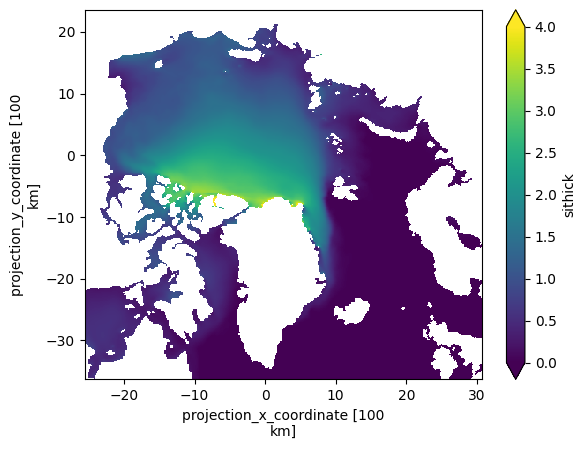

In [59]:
sit_am.plot(vmax=4, vmin=0)
plt.show()
sit_bl.plot(vmax=4, vmin=0)

In [14]:
s1d_na = sit_nam.to_numpy().reshape((479*450))

In [23]:
s1d_ml = sit_ml.to_numpy().reshape((479*450))

In [52]:
s1d_bl = sit_bl.to_numpy().reshape((479*450))

In [60]:
s1d_a = sit_am.to_numpy().reshape((479*450))

In [20]:
idx_nonan = ~np.isnan(s1d_na)

In [22]:
s1d_nanon = s1d_na[idx_nonan]

In [24]:
s1d_mlnon = s1d_ml[idx_nonan]

In [53]:
s1d_blnon = s1d_bl[idx_nonan]

In [61]:
s1d_anon = s1d_a[idx_nonan]

In [43]:
from scipy.stats import pearsonr

In [80]:
corr_ml, p_ml = pearsonr(s1d_mlnon, s1d_anon)

In [81]:
corr_ml, p_ml

(0.9935663909860127, 0.0)

In [82]:
corr_bl, p_bl = pearsonr(s1d_blnon, s1d_anon)

In [83]:
corr_bl, p_bl

(0.9932087471651404, 0.0)

In [84]:
corr_na, p_na = pearsonr(s1d_nanon, s1d_anon)

In [85]:
corr_na, p_na

(0.9149396206427511, 0.0)

In [87]:
np.corrcoef(s1d_mlnon, s1d_anon)

array([[1.        , 0.99356639],
       [0.99356639, 1.        ]])

In [96]:
corr2d = np.corrcoef(sit_ml.isel(x=slice(200,250), y=slice(300,350)), sit_am.isel(x=slice(200,250), y=slice(300,350)))

In [194]:
idx_cells = np.where(~np.isnan(sit_na.isel(time=0).to_numpy()))

# ---------------------------

In [12]:
import copy

In [10]:
x = sit_na
y = sit_a

In [33]:
idx_cells = np.where((~np.isnan(x.isel(time=0).to_numpy()))
                    &(x.isel(time=0)==0)
                    )

In [35]:
idx_cells[0].shape

(41933,)

In [36]:
sit_nan = (sit_ml.where((0<sit_ml))).where(np.isfinite(sit_ml))

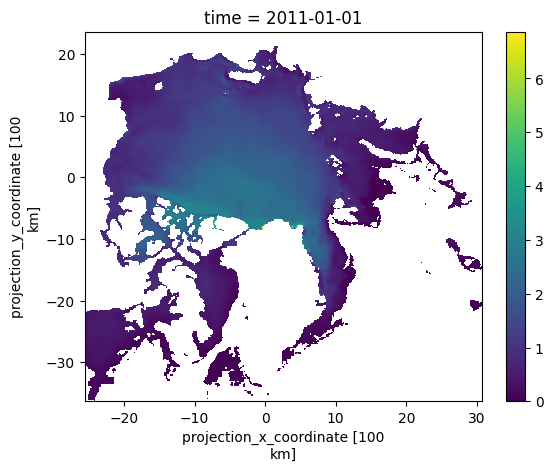

In [38]:
sit_nan.isel(time=0).plot()

In [30]:
#     n_cells = np.where(~np.isnan(x))
idx_cells = np.where(~np.isnan(x.isel(time=0).to_numpy()))  # cells non-NAN

# cells non-NaN and SIT != 0


cells_x, cells_y = idx_cells[0], idx_cells[1]
corr_2d = copy.deepcopy(x.isel(time=0)*0)

sit_0 = []
#     

for ni, (j, i) in enumerate(zip(cells_x[:100], cells_y[:100])):
    ts_x = x.isel(x=i, y=j).to_numpy()
    ts_y = y.isel(x=i, y=j).to_numpy()
    if (ts_y==0).all() or (ts_x==0).all():
        sit_0 += [(j,i)]
        corr_coef = -999
    else:
        corr_coef = np.corrcoef(ts_x, ts_y)[0,1]

    corr_2d[i,j] = corr_coef
    if np.isnan(corr_coef):
        import pdb; pdb.set_trace()
    print(corr_coef)


0.877680648727749
0.8569623484685002
0.8592074760605464
0.8775967748040422
0.8802235057884952
0.8625122487125243
0.8374514750791514
0.7993490339220922
0.7372737637251257
0.6822927448264341
0.6586414220298907
0.5560732572500448
0.32971369113918686
0.19442127907199205
0.07096669317838247
0.01524252049659179
0.006958249951313015
-0.0017857434808826365
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999
-999


# ---------------------------

In [57]:
c2 = correlation_2d(sit_bl, sit_a)

In [10]:
c2, b2, r2 = correlation_2d(sit_bl, sit_a)

In [30]:
c2_ml, b2_ml, r2_ml = correlation_2d(sit_ml, sit_a)

/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [34]:
c2_na, b2_na, r2_na = correlation_2d(sit_na, sit_a)

In [9]:
import copy

def correlation_2d(x, y):
    '''
    Return correlation coefficient for each cell on the (lat,lon) grid
    
    Parameters:
    -----------
        x      : 3D array (time, lat, lon)
        y      : 3D array (time, lat, lon)
        
    '''
    
#     n_cells = np.where(~np.isnan(x))
    idx_cells = np.where(~np.isnan(x.isel(time=0).to_numpy()))  # cells non-NAN
    cells_x, cells_y = idx_cells[0], idx_cells[1]
    corr_2d = copy.deepcopy(x.isel(time=0)*0)
    bias_2d = copy.deepcopy(x.isel(time=0)*0)
    rmse_2d = copy.deepcopy(x.isel(time=0)*0)
    

    # Remove indexes with SIT == 0

    for ni, (j, i) in enumerate(zip(cells_x, cells_y)):
        ts_x = x.isel(x=i, y=j).to_numpy()
        ts_y = y.isel(x=i, y=j).to_numpy()
        if (ts_y==0).all() or (ts_x==0).all():
            corr_coef = -999
            bias_tmp = -999
            rmse_tmp = -999
            
        else:
            corr_coef = np.corrcoef(ts_x, ts_y)[0,1]
            bias_tmp = np.mean(ts_x - ts_y)
            rmse_tmp = np.sqrt(np.mean(np.square(ts_x - ts_y), axis=0))
            
            # import pdb; pdb.set_trace()

        corr_2d[j, i] = corr_coef
        bias_2d[j, i] = bias_tmp
        rmse_2d[j, i] = rmse_tmp
        
        
    return corr_2d, bias_2d, rmse_2d

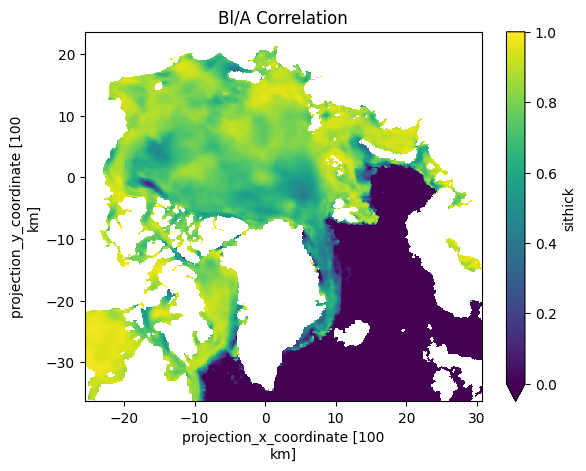

In [27]:
c2.plot(vmin=0, vmax=1)
plt.title('Bl/A Correlation');

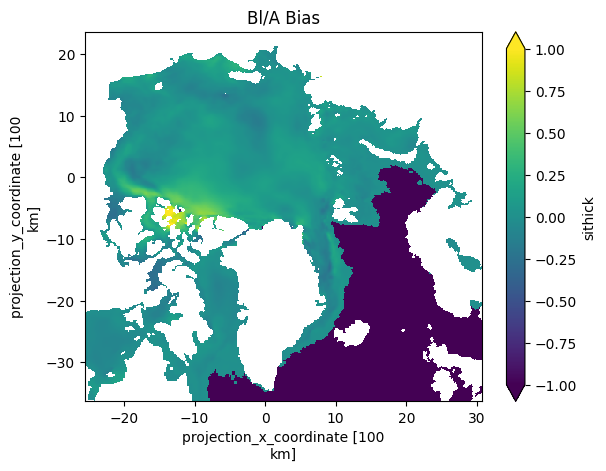

In [28]:
b2.plot(vmin=-1, vmax=1)
plt.title('Bl/A Bias');

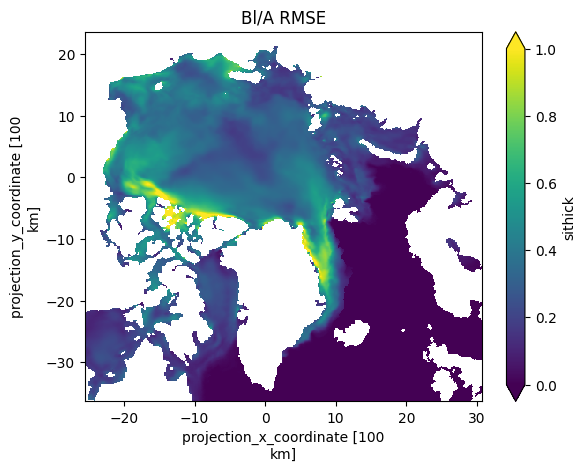

In [29]:
r2.plot(vmin=0, vmax=1)
plt.title('Bl/A RMSE');

In [36]:
c2_na.where(-990<c2_na).mean(('y','x'))

<xarray.DataArray 'sithick' ()>
array(0.7987168, dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-01

In [37]:
r2_na.where(-990<r2_na).mean(('y','x'))

<xarray.DataArray 'sithick' ()>
array(0.41987622, dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-01

In [38]:
b2_na.where(-990<c2_na).mean(('y','x'))

<xarray.DataArray 'sithick' ()>
array(-0.17684636, dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-01

In [23]:
# Spatial average of time correlation for each grid cell over time period
# Correlation non assimilated and assimilated 
# corr (na, a) = 0.7987
# corr (ml, a) = 0.7728
# corr (bl, a) = 0.7403

# rmse (na, a) = 0.41987
# rmse (ml, a) = 0.2852
# rmse (bl, a) = 0.3206

# bias (na, a) = -0.1769
# bias (ml, a) = 0.00727
# bias (bl, a) = 0.03912

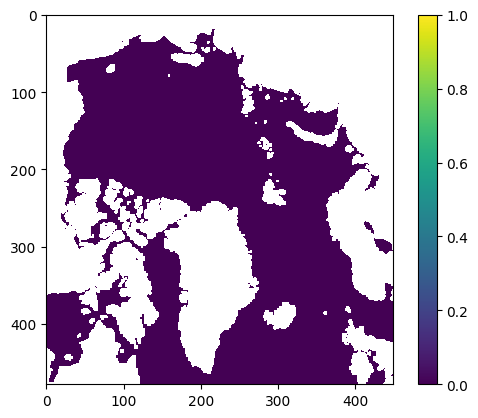

In [178]:
plt.imshow(c2[::-1])
plt.colorbar()

# ---------------------

In [5]:
# Plot Histogram of biases predicted and true biases as a function of sea ice thickness (non assimilated in TOPAZ)

In [6]:
s1.compare_bias_ml_da()

/users/edelleo1/tardis/tardis-ml/src/modelling/sit_corrected.py:487: RuntimeWarning: Mean of empty slice
  mean_corr += [np.nanmean(corr[idx])]
/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
from src.visualization import visualize_sit_corr

In [32]:
reload(visualize_sit_corr)

<module 'src.visualization.visualize_sit_corr' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_sit_corr.py'>

Saved as: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/figures/sit_bias_diff_01.png


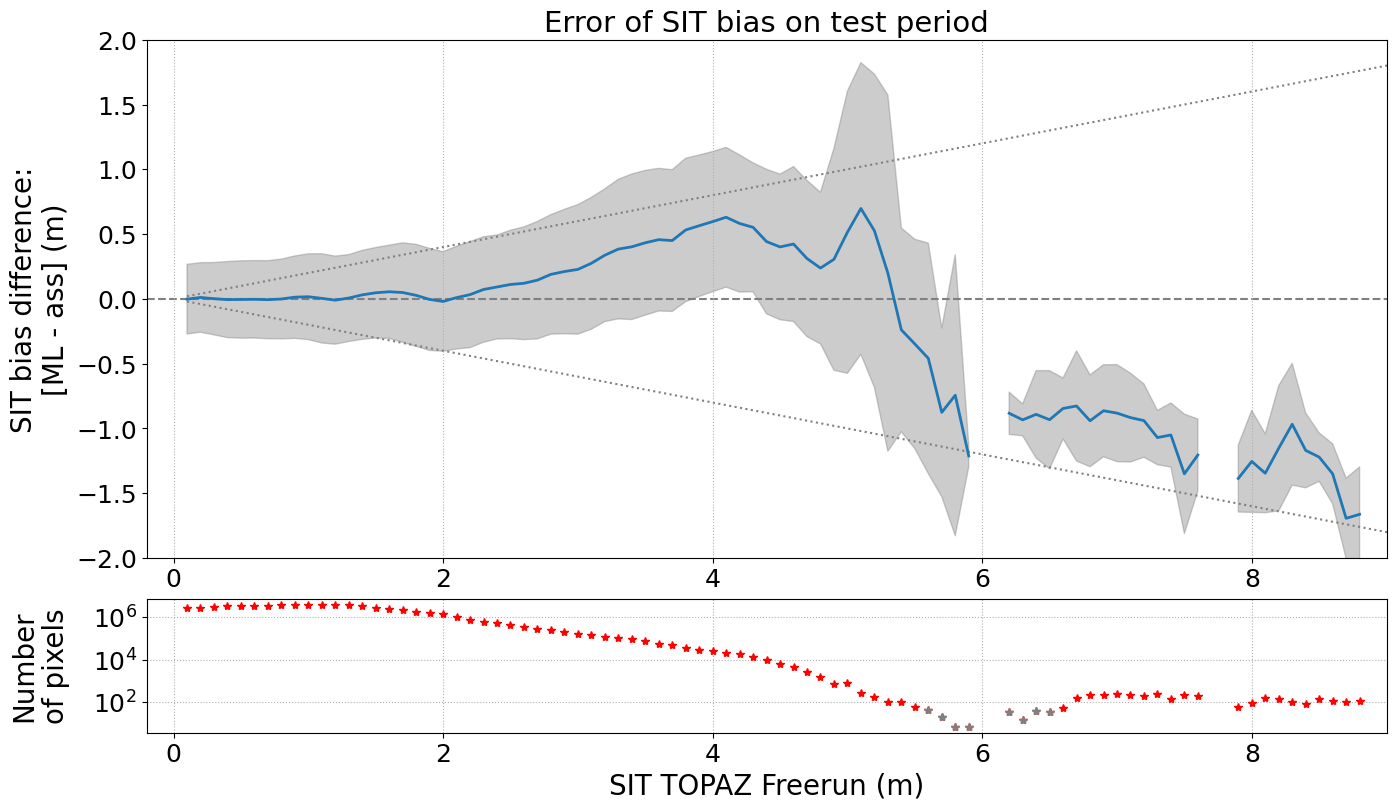

In [33]:
visualize_sit_corr.draw_error_bias(s1.bias_diff_mean, s1.bias_diff_std, s1.bins, s1.n_pixels, 
                                   rootdir=s1.config.rootdir, fig_dir = s1.config.fig_dir, savefig=True)

In [31]:
8 * 20/100

1.6

In [21]:
(s1.diff_corr_abs == diff_corr_abs).all()

True

In [76]:
# Correction by DA
corr_ass = s1.Xe.isel(time=slice(None,s1.ntest)).to_numpy().reshape((s1.ntest*479*450))

# Correction by ML
corr_ml = s1.Xc.isel(time=slice(None,s1.ntest)).to_numpy().reshape((s1.ntest*479*450))

sit_na = s1.sit_na.isel(time=slice(None,s1.ntest)).to_numpy().reshape((s1.ntest*479*450))

In [39]:
# Correction by baseline
corr_bl = s1.sit_bl.isel(time=slice(None,s1.ntest)) - s1.sit_na.isel(time=slice(None,s1.ntest))
corr_bl = corr_bl.to_numpy().reshape((s1.ntest*479*450))

In [40]:
corr_bl = np.delete(corr_bl, idx_nan)
# corr_bl = np.delete(corr_bl, idx_nan_diff)
# corr_bl = np.delete(corr_bl, idx_inf)


In [77]:
# Remove NaN index due to land
idx_nan = np.where(np.isnan(corr_ass))[0]

corr_ass = np.delete(corr_ass, idx_nan)
corr_ml = np.delete(corr_ml, idx_nan)
sit_na = np.delete(sit_na, idx_nan)

In [78]:
# Compute the difference of correction relative to the thickness of the sea ice (TOPAZ freerun)

diff_corr = (corr_ml - corr_ass)/ abs(corr_ass)               # sit_na

/tmp/ipykernel_146686/3927492618.py:3: RuntimeWarning: divide by zero encountered in true_divide
  diff_corr = (corr_ml - corr_ass)/ abs(corr_ass)               # sit_na
/tmp/ipykernel_146686/3927492618.py:3: RuntimeWarning: invalid value encountered in true_divide
  diff_corr = (corr_ml - corr_ass)/ abs(corr_ass)               # sit_na


In [51]:
# Compute the difference of correction relative to the thickness of the sea ice (TOPAZ freerun)

diff_corr_bl = (corr_bl - corr_ass)/sit_na

/tmp/ipykernel_146686/1172783563.py:3: RuntimeWarning: divide by zero encountered in true_divide
  diff_corr_bl = (corr_bl - corr_ass)/sit_na
/tmp/ipykernel_146686/1172783563.py:3: RuntimeWarning: invalid value encountered in true_divide
  diff_corr_bl = (corr_bl - corr_ass)/sit_na


In [79]:
# Remove NaN index due to SIT=0
idx_nan_diff = np.where(np.isnan(diff_corr))[0]

diff_corr = np.delete(diff_corr, idx_nan_diff)
sit_na = np.delete(sit_na, idx_nan_diff)

In [80]:
# Remove NaN index due to substraction
idx_inf = np.where(np.isinf(diff_corr))[0]

diff_corr = np.delete(diff_corr, idx_inf)
sit_na = np.delete(sit_na, idx_inf)

In [19]:
diff_corr_abs = (corr_ml - corr_ass)

In [81]:
mn2, std2, bins2, n_pix2 = compute_corr_af_sit(diff_corr, sit_na)

/tmp/ipykernel_146686/2930083293.py:23: RuntimeWarning: Mean of empty slice
  mean_corr += [np.nanmean(corr[idx])]


In [57]:
mn3, std3, bins3, n_pix3 = compute_corr_af_sit(diff_corr_bl, sit_na)

/tmp/ipykernel_146686/2930083293.py:23: RuntimeWarning: Mean of empty slice
  mean_corr += [np.nanmean(corr[idx])]


In [33]:
reload(visualize_sit_corr)

<module 'src.visualization.visualize_sit_corr' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_sit_corr.py'>

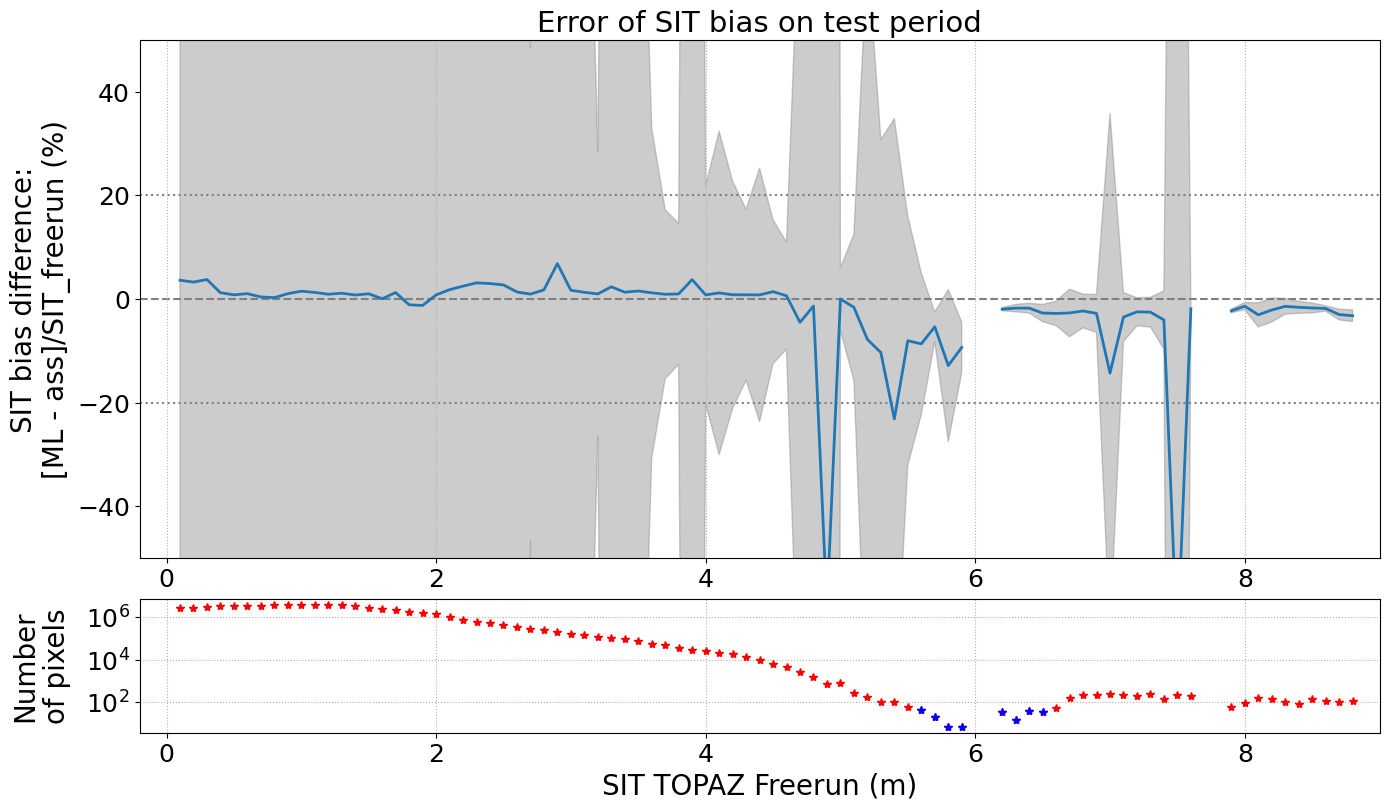

In [88]:
visualize_sit_corr.draw_error_bias(mn2/100, std2/100, bins2, n_pix2)

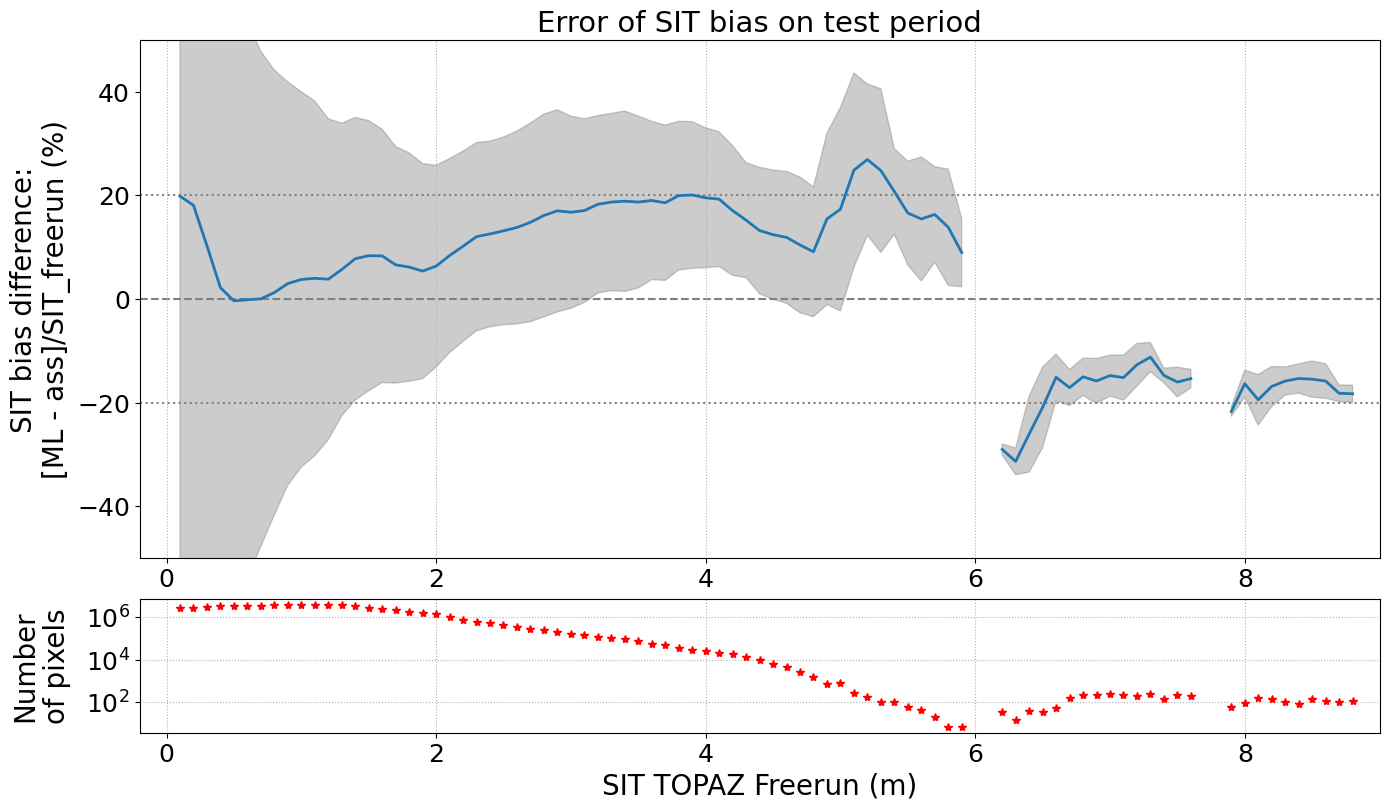

In [58]:
visualize_sit_corr.draw_error_bias(mn3, std3, bins3, n_pix3)

## Only for SIT_freerun > 2 meters

In [77]:
ind2 = np.where(sit_na>5)[0]

In [80]:
H, yedges, xedges = np.histogram2d(diff_corr[ind2], sit_na[ind2], bins=100)

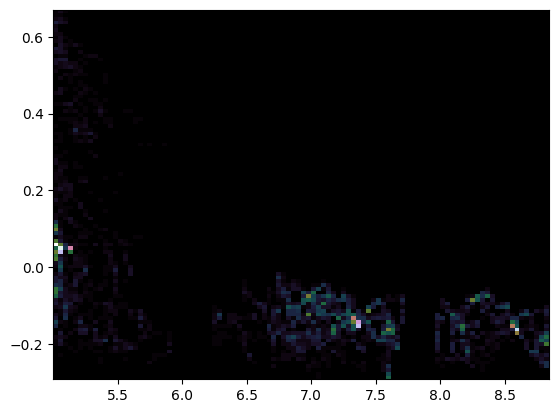

In [81]:
plt.pcolormesh(xedges, yedges, H, cmap=plt.get_cmap('cubehelix'))

In [85]:
diff_corr[ind2]

array([-0.10697254, -0.15007609, -0.1622724 , ..., -0.0693312 ,
       -0.07312634, -0.09454854])

In [89]:
idx = np.where((sit_na[ind2]>7.1)&(sit_na[ind2]<=7.2))

In [91]:
np.nanmean(sit_na[ind2][idx])

7.1470284

In [92]:
np.nanmean(diff_corr[ind2][idx])

-0.12816351511330765

## Other way

In [118]:
mn, std, bins, n_pix = compute_corr_af_sit(diff_corr, sit_na)

/tmp/ipykernel_84640/3328863498.py:22: RuntimeWarning: Mean of empty slice
  mean_corr += [np.nanmean(corr[idx])]


In [215]:
mn_abs, std_abs, bins, n_pix_abs = compute_corr_af_sit(diff_corr_abs, sit_na)

/tmp/ipykernel_84640/2930083293.py:23: RuntimeWarning: Mean of empty slice
  mean_corr += [np.nanmean(corr[idx])]


In [221]:
from src.visualization import visualize_sit_corr

In [222]:
from importlib import reload

In [ ]:
s1.

In [236]:
diff_corr_abs.shape

(130294672,)

In [ ]:
diff_corr_abs == s1.diff_corr_abs

/users/edelleo1/tardis/tardis-ml/src/utils/modif_plot.py:45: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.draw()


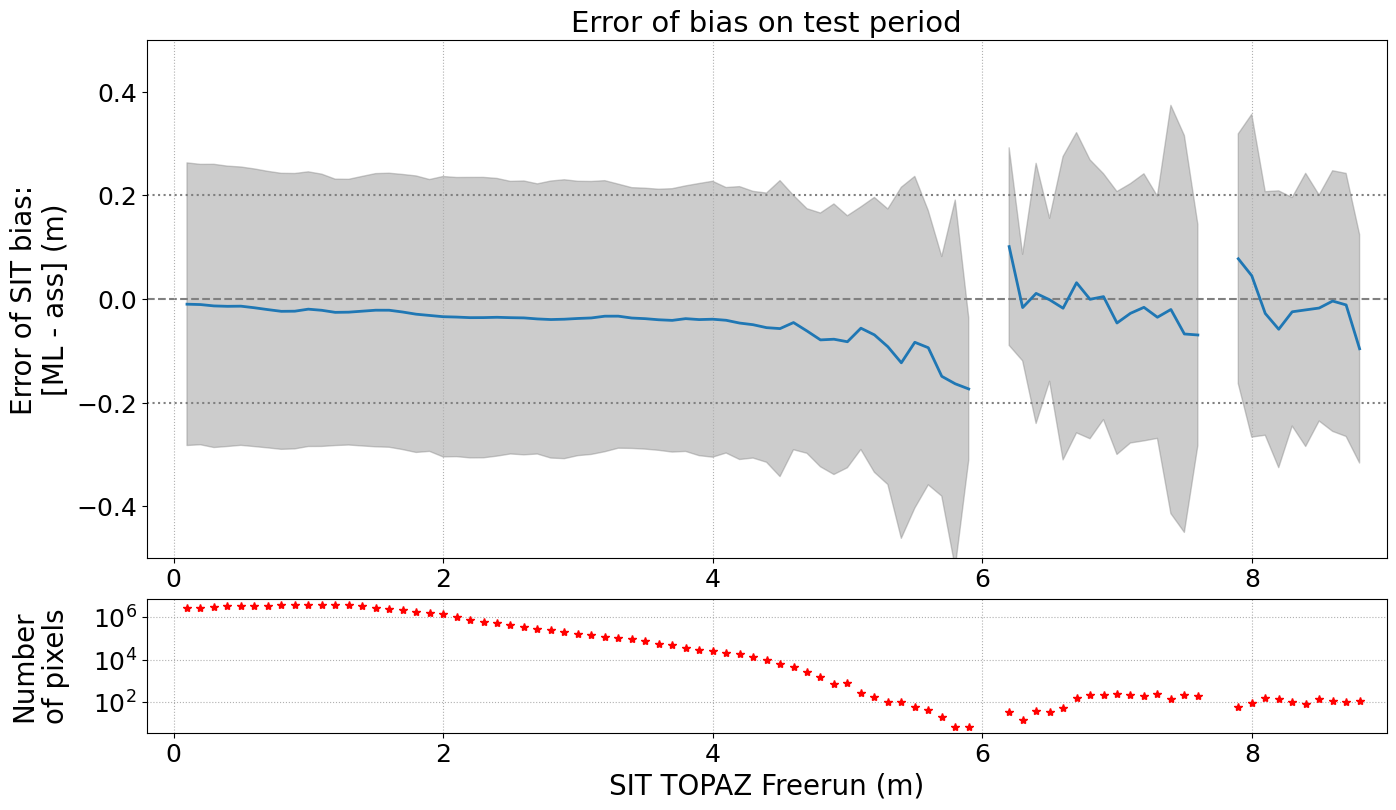

In [227]:
visualize_sit_corr.draw_error_bias(s1.bias_diff_mean, s1.bias_diff_std, s1.bins, s1.n_pixels)

/users/edelleo1/tardis/tardis-ml/src/utils/modif_plot.py:45: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.draw()


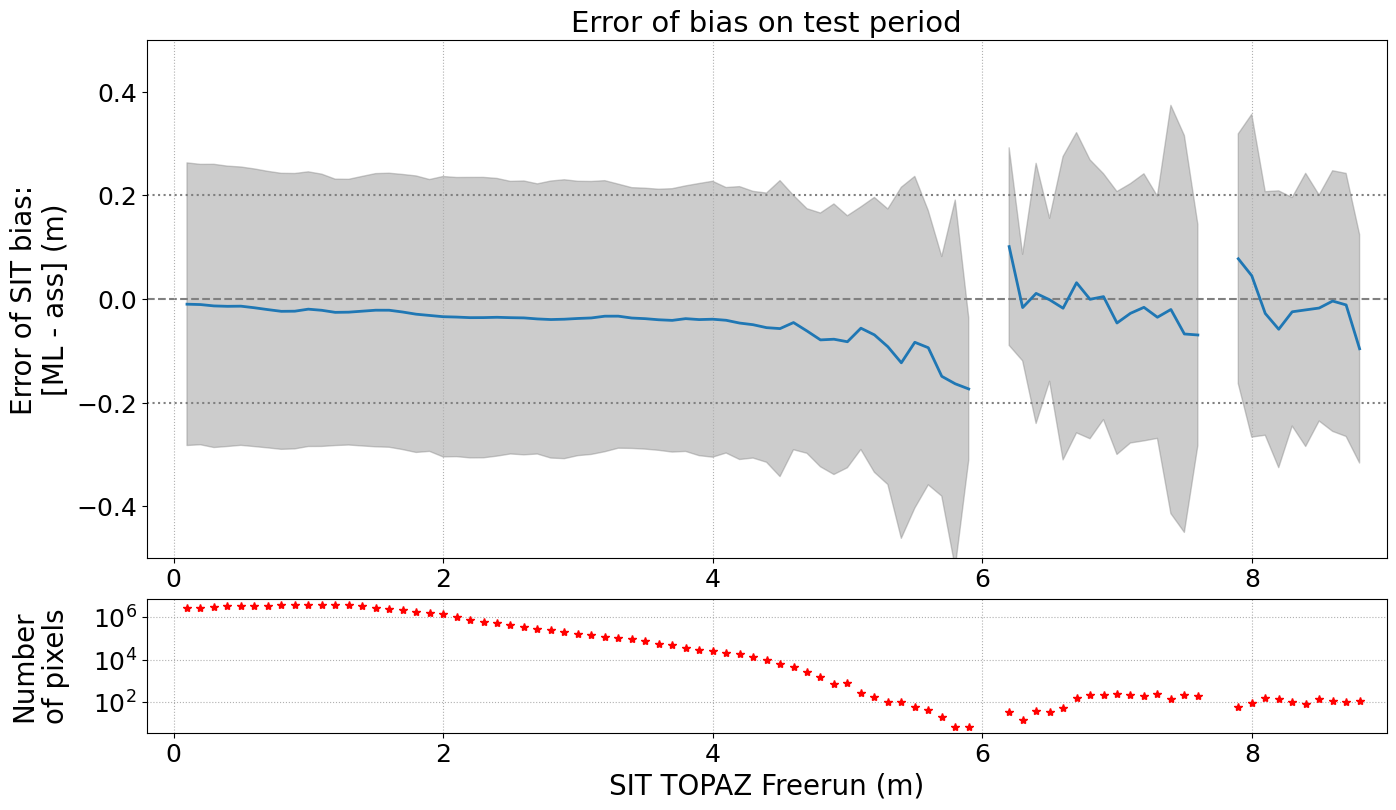

In [227]:
visualize_sit_corr.draw_error_bias(mn_abs, std_abs, bins, n_pix_abs)

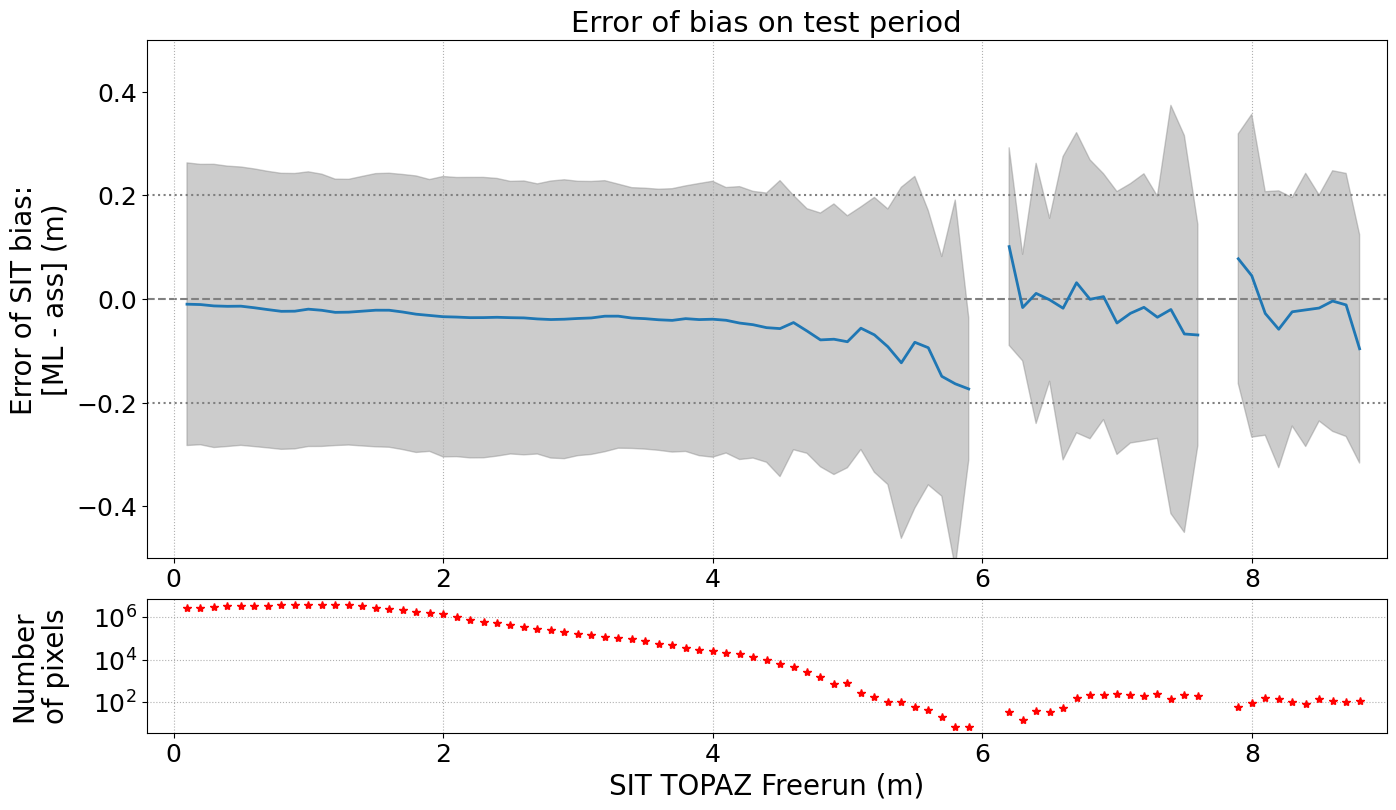

In [220]:
from matplotlib import gridspec  # uneven subplot

fig = plt.figure(constrained_layout=True, figsize=(16,9))

gs = gridspec.GridSpec(20, 20)
ax0 = fig.add_subplot(gs[0:15, :])
ax1 = fig.add_subplot(gs[16:, :])

ax0.plot(bins[1:], mn_abs[1:], lw=2)
ax0.fill_between(bins[1:], mn_abs[1:]-std_abs[1:], mn_abs[1:]+std_abs[1:], color='grey', alpha=0.4)
ax0.axhline(0, c='grey', ls='--', zorder=-5)
ax0.axhline(0.2, c='gray', ls=':', zorder=-5)
ax0.axhline(-0.2, c='gray', ls=':', zorder=-5)


ax0.set_ylabel('Error of SIT bias:\n[ML - ass] (m)')  # correction [ML - ass]/SIT_freerun (%)')
# ax0.set_xlabel('Sea ice thickness Freerun (m)')

ax0.set_ylim([-.5,.5])
ax0.set_xlim([-.2,9])
ax0.xaxis.grid(zorder=-10, ls=':')


ax1.plot(bins[1:], n_pix_abs[1:], 'r*')

ax1.set_yscale('log')
ax1.xaxis.grid(zorder=-10, ls=':')
ax1.yaxis.grid(ls=':')
ax1.set_ylabel('Number\nof pixels')
ax1.set_xlabel('SIT TOPAZ Freerun (m)');
ax1.set_xlim([-.2,9])

ax0.set_title('Error of bias on test period')

fig.align_ylabels([ax0, ax1])

modif_plot.resize(fig, s=18)



In [23]:
# get mean and std for each bin of SIT (freerun) of 0.1m

def compute_corr_af_sit(corr, sit_na):
    '''Compute mean correction as function of the SIT
    Parameters:
    -----------
    
        corr    : 1D array, difference of correction between ML and DA
        sit_na  : 1D array, SIT (m) from TOPAZ freerun
    '''
    
    bin_width = 0.1
    bins_x = np.arange(0, 10+bin_width, bin_width)
    
    mean_corr = []
    std_corr = []
    n_pixels = []
    
    
    for nb, b in enumerate(bins_x):
        idx = np.where((sit_na>b)&(sit_na<=b+bin_width))
        n_pixels += [len(idx[0])]
        mean_corr += [np.nanmean(corr[idx])]
        std_corr += [np.nanstd(corr[idx])]

        
    return np.array(mean_corr), np.array(std_corr), bins_x, np.array(n_pixels)

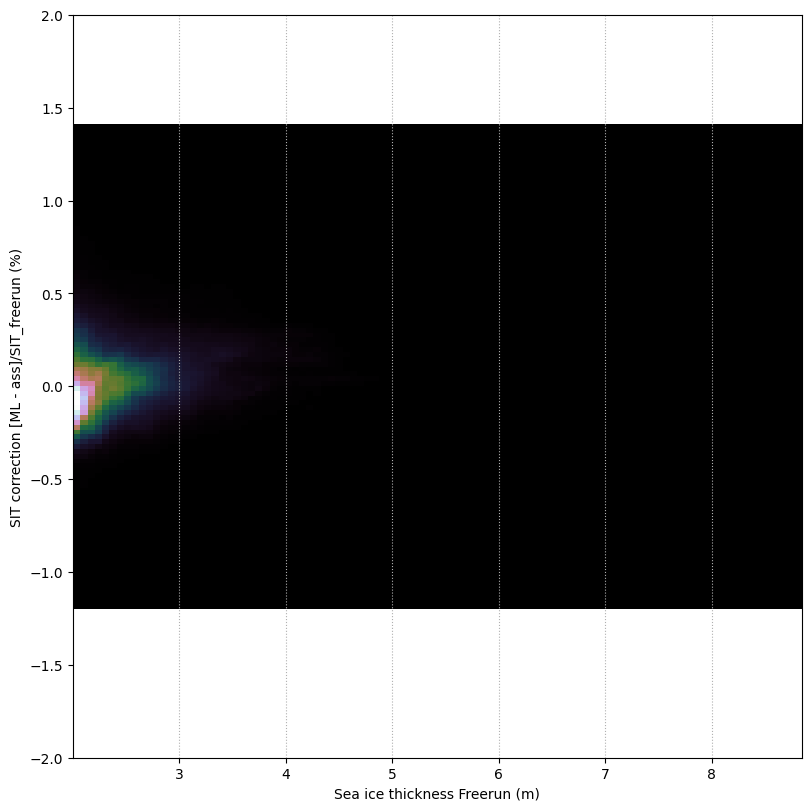

In [66]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,8))

# plt.scatter(sit_na, diff_corr)
# plt.scatter(sit_na, , alpha=0.3, label='ML')

plt.pcolormesh(xedges, yedges, H, cmap=plt.get_cmap('cubehelix'))

plt.axhline(0, c='k', ls='--', zorder=-5)

ax.set_ylabel('SIT correction [ML - ass]/SIT_freerun (%)')
ax.set_xlabel('Sea ice thickness Freerun (m)')

ax.set_ylim([-2,2])

ax.xaxis.grid(zorder=-10, ls=':')


# plt.legend()

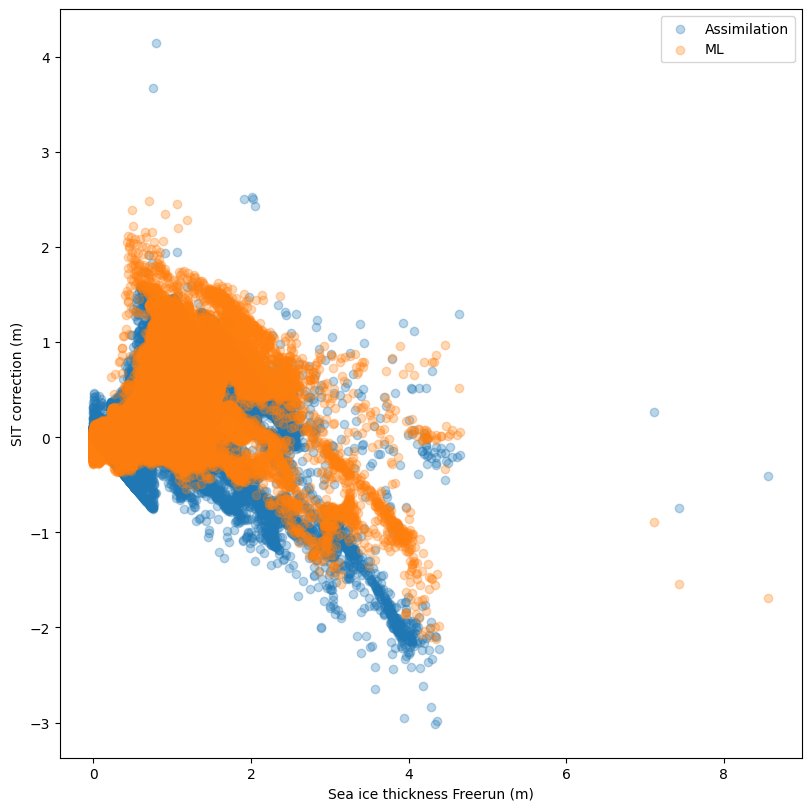

In [49]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,8))

plt.scatter(sit_na, corr_ass, alpha=0.3, label='Assimilation')
plt.scatter(sit_na, corr_ml, alpha=0.3, label='ML')
ax.set_ylabel('SIT correction (m)')
ax.set_xlabel('Sea ice thickness Freerun (m)')

plt.legend()

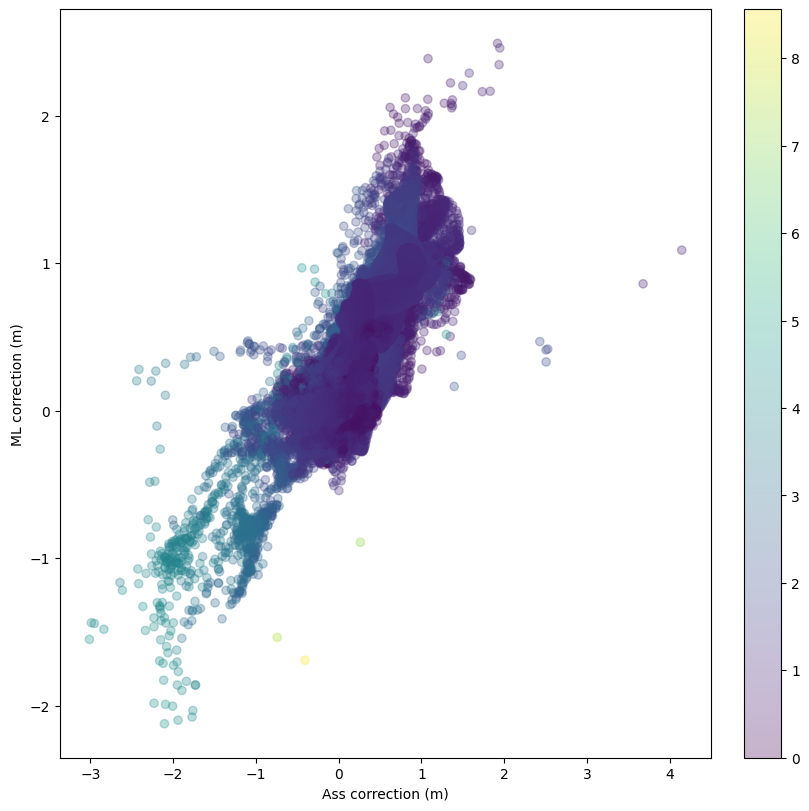

In [53]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,8))

plt.scatter(corr_ass, corr_ml, c=sit_na , alpha=0.3)
ax.set_xlabel('Ass correction (m)')
ax.set_ylabel('ML correction (m)')

plt.colorbar()

# ---------------------

In [38]:
s1.RMSE_bl = s1.RMSE_rece*2

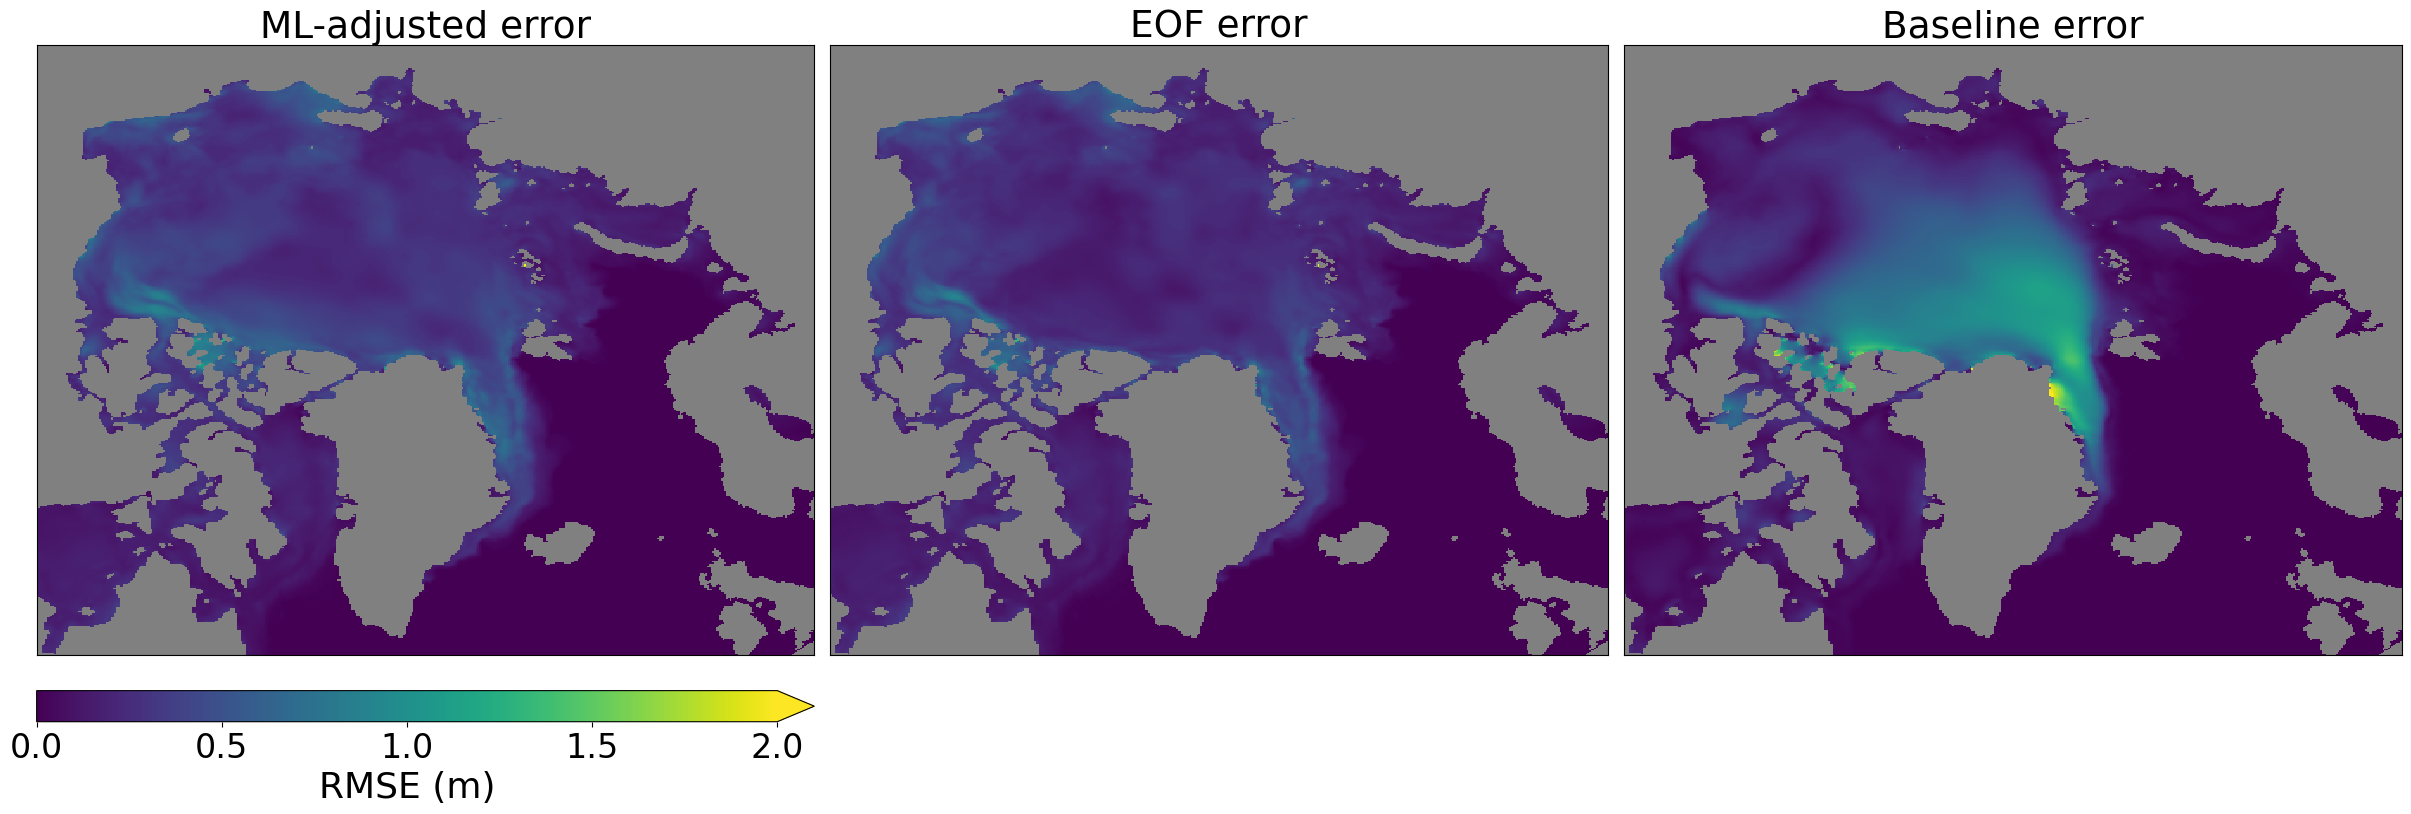

In [14]:
vsc.draw_rmse(s1, rootdir=s1.config.rootdir, fig_dir=s1.config.fig_dir, savefig=False, showfig=True)

In [32]:
s1.sit_bl = s1.sit_na*1.3

In [33]:
s1.compute_mean(sic_min=.15)

In [34]:
s1.sit_m

<xarray.DataArray 'sithick' (time: 4383)>
array([1.0789968, 1.0849915, 1.0908644, ..., 1.0431399, 1.0484266,
       1.053707 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2022-12-31

In [6]:
s1.sit_blm = s1.sit_m*1.2

In [36]:
s1.ntest=1085

In [23]:
reload(vsc)

<module 'src.visualization.visualize_sit_corr' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_sit_corr.py'>

AttributeError: 'SITCorrected' object has no attribute 'sit_am'

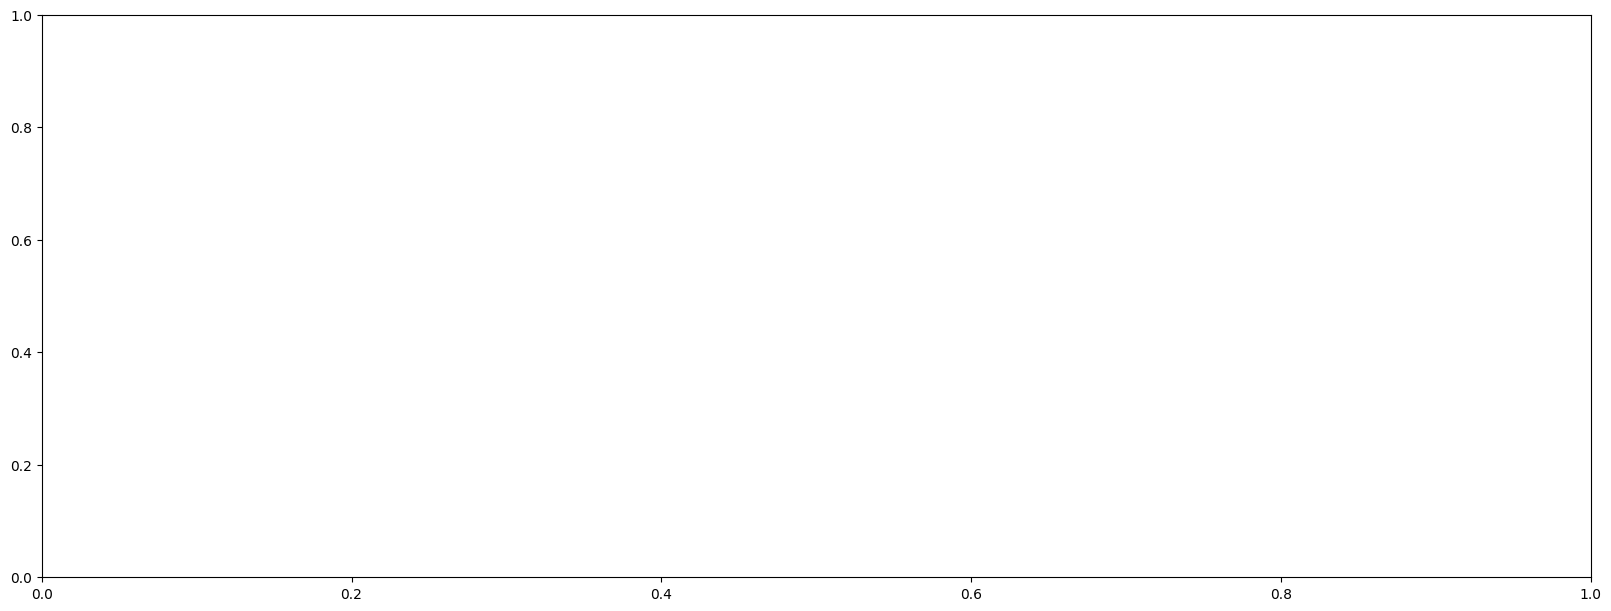

In [18]:
vsc.draw_sit(s1, rootdir=s1.config.rootdir, fig_dir=s1.config.fig_dir, showfig=True, savefig=False)

In [38]:
from src.visualization import mdl_ypred_PCA

In [16]:
s1.npca =8

In [61]:
reload(mdl_ypred_PCA)

<module 'src.visualization.mdl_ypred_PCA' from '/users/edelleo1/tardis/tardis-ml/src/visualization/mdl_ypred_PCA.py'>

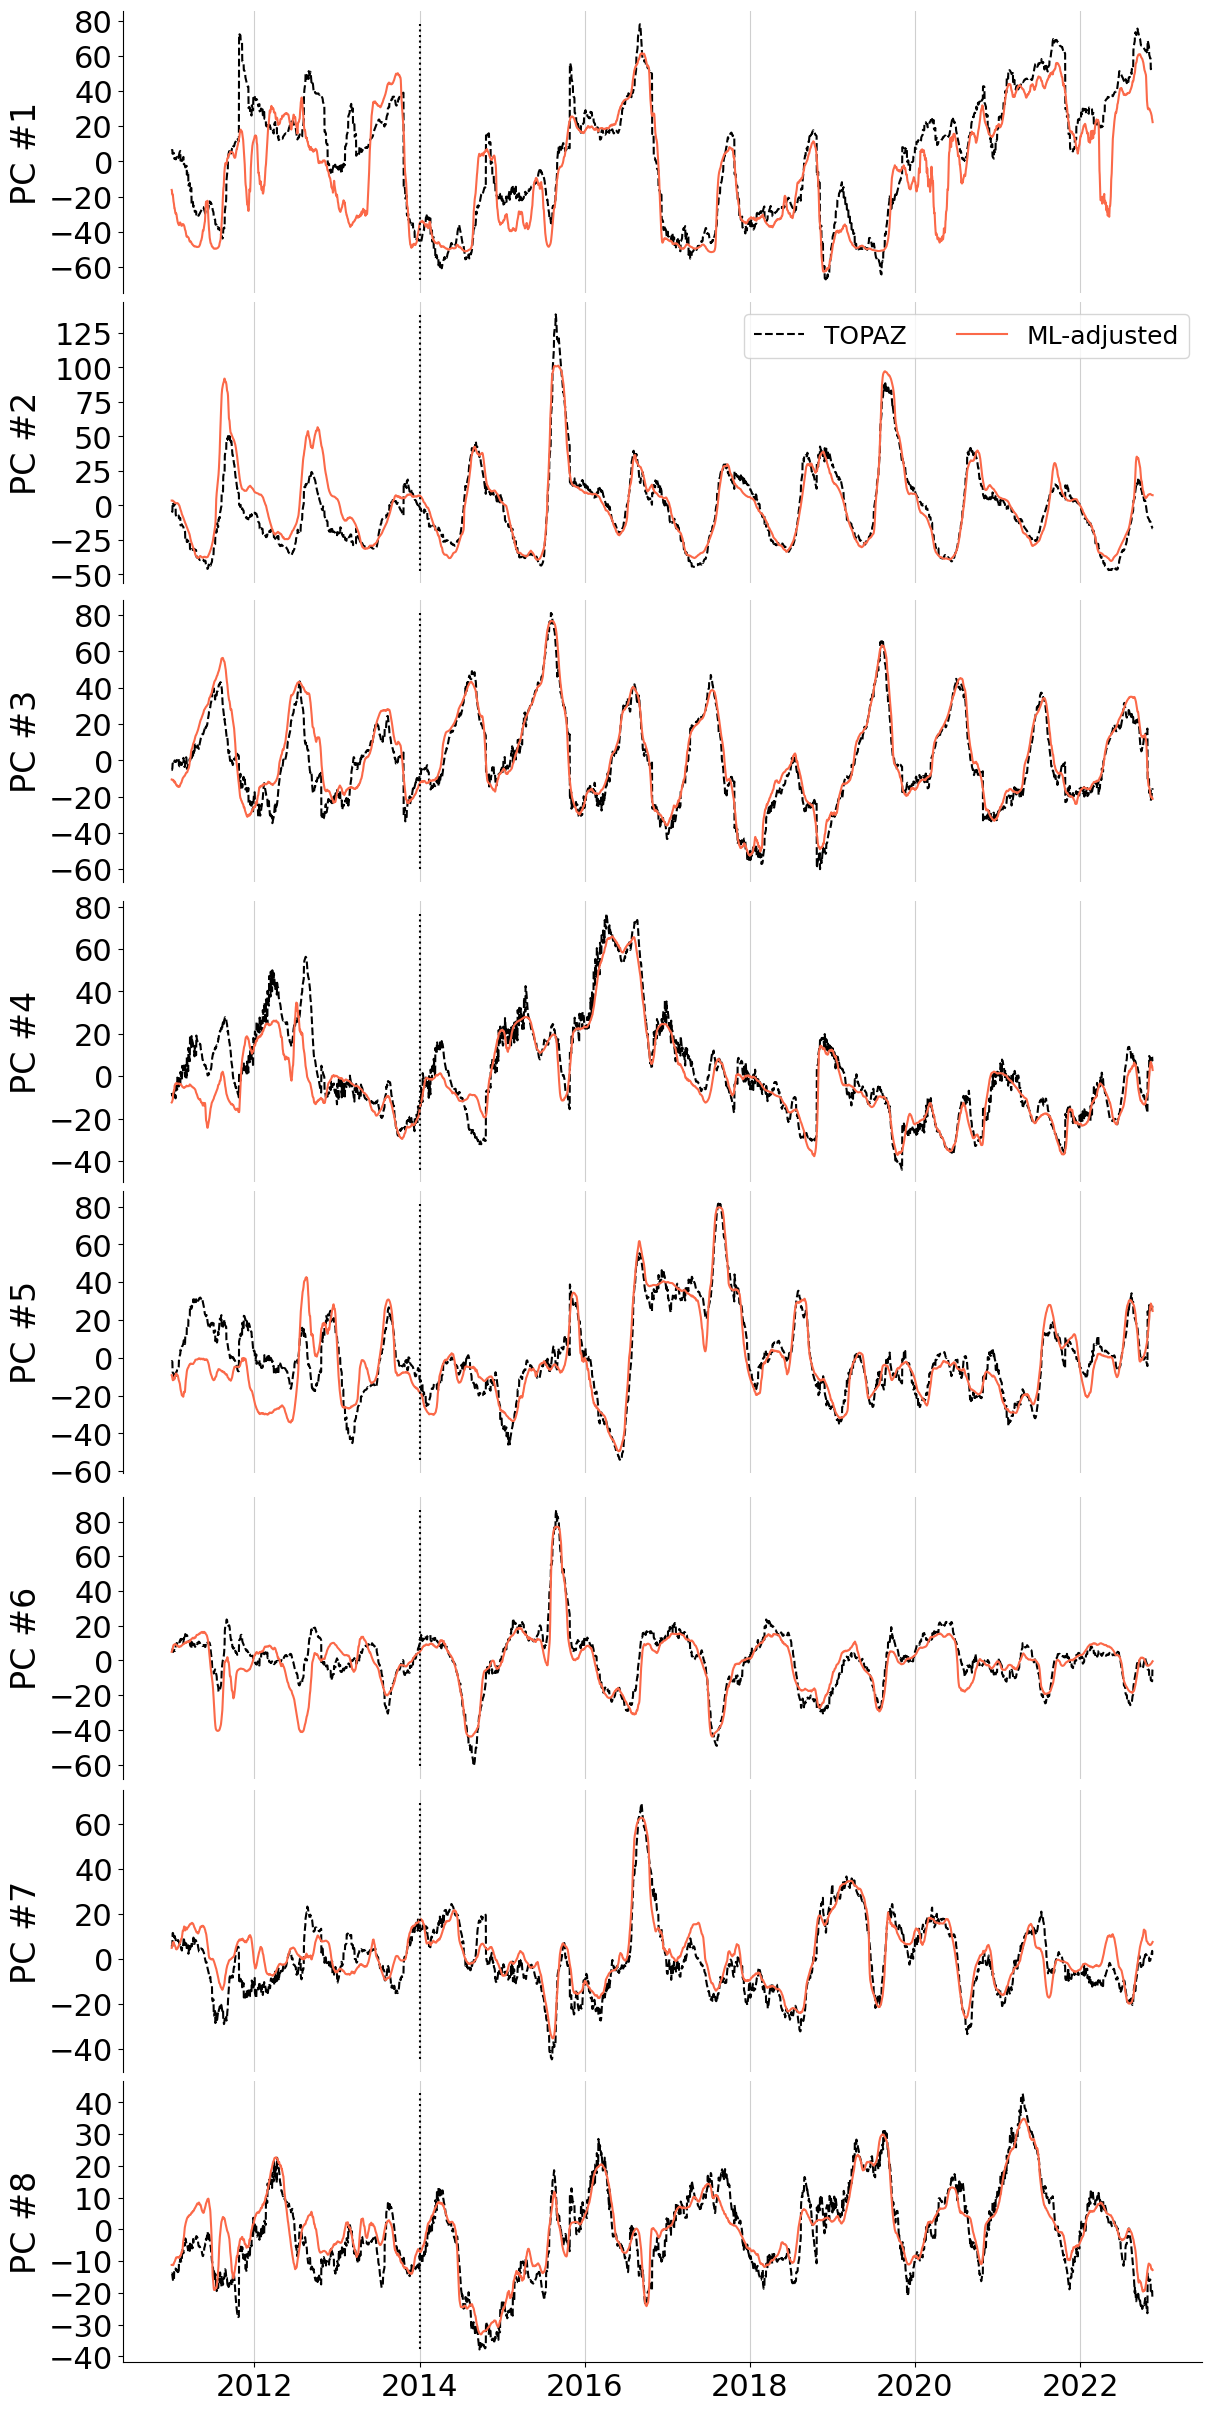

In [17]:
mdl_ypred_PCA.draw(s1)

In [3]:
s1.compute_improvement()

MemoryError: Unable to allocate 7.55 GiB for an array with shape (479, 450, 4704) and data type float64

# New try

In [ ]:
# new skill score: % of improvement
# 1 - [ RMSE (LSTM/ML) / RMSE (no correction) ]

# 1 = RMSE ML decreases: improvement increases
# 0 = RMSE ML equals RMSE without assimilation: the improvement is neutral

In [4]:
s1.RMSE_rece.shape

(479, 450)

In [6]:
s1.Xe.shape

(4748, 479, 450)

In [4]:
ntest=400 # 4748  # 2970

In [6]:
# rmse machine learning compare to Truth (TOPAZ4b)
rmse_ml = np.sqrt(np.square(s1.Xe_rec.isel(time=slice(None,ntest))-s1.Xe.isel(time=slice(None,ntest))))

In [91]:
rmse_fr = np.sqrt(np.square(s1.sit_na.where(s1.sit_na.isel(time=slice(None,nt))).isel(time=slice(None,nt))-s1.Xe.where(s1.sit_na.isel(time=slice(None,nt))).isel(time=slice(None,nt))))


In [92]:
skk = 1- (rmse_ml / rmse_fr)

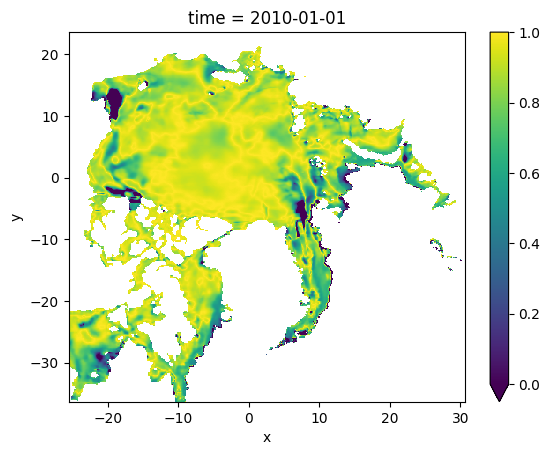

In [101]:
skk.isel(time=0).plot(vmin=0, vmax=1)

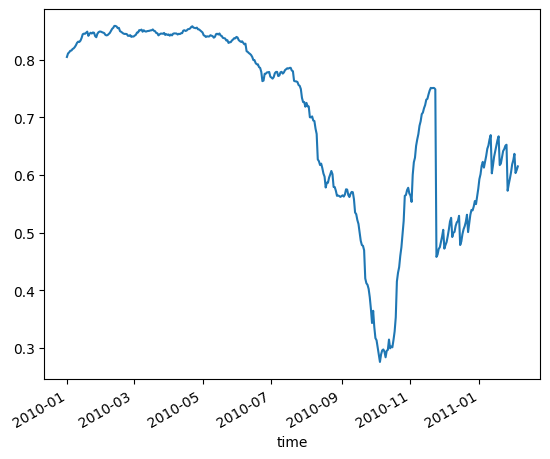

In [107]:
skk.where(skk>-10).mean(('y','x')).plot()

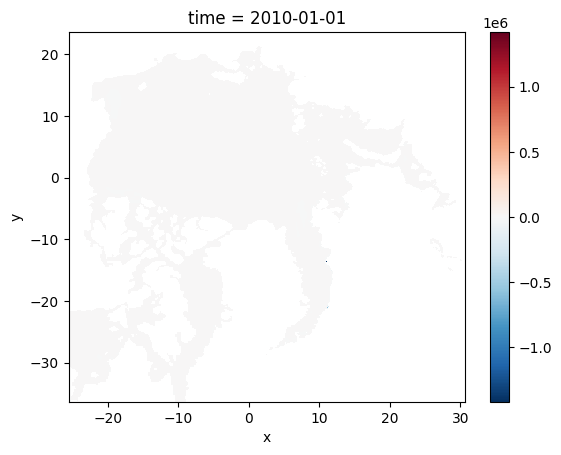

In [98]:
skk.isel(time=0).plot()

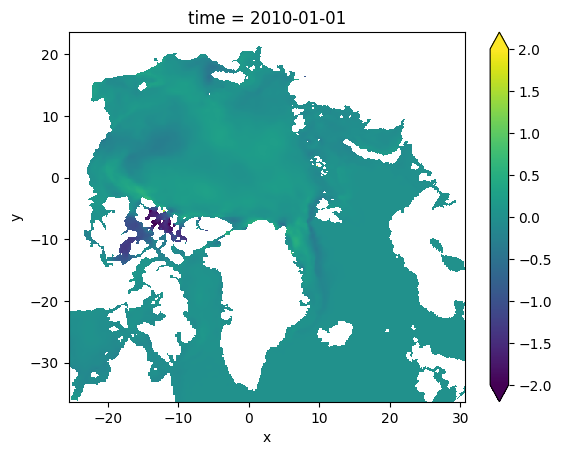

In [79]:
s1.Xe_rec.isel(time=0).plot(vmin=-2,vmax=2)

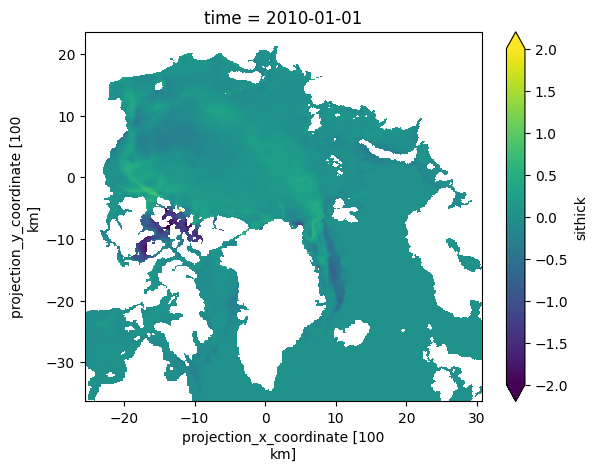

In [80]:
s1.Xe.isel(time=0).plot(vmin=-2,vmax=2)

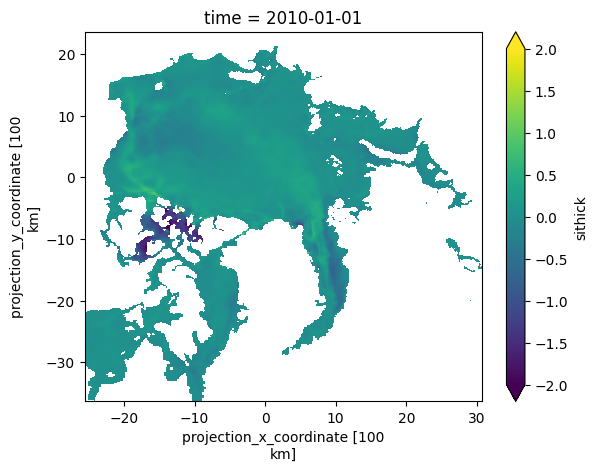

In [82]:
s1.Xe.where(s1.Xe.isel(time=0)).isel(time=0).plot(vmin=-2,vmax=2)

In [5]:
nt = ntest

In [36]:
rmse_ml = np.sqrt(np.square(s1.sit.where(s1.sit.isel(time=slice(None,nt))).isel(time=slice(None,nt))-s1.sit_a.where(s1.sit_a.isel(time=slice(None,nt))).isel(time=slice(None,nt))))

In [37]:
rmse_fr = np.sqrt(np.square(s1.sit_na.where(s1.sit_na.isel(time=slice(None,nt))).isel(time=slice(None,nt))-s1.sit_a.where(s1.sit_a.isel(time=slice(None,nt))).isel(time=slice(None,nt))))

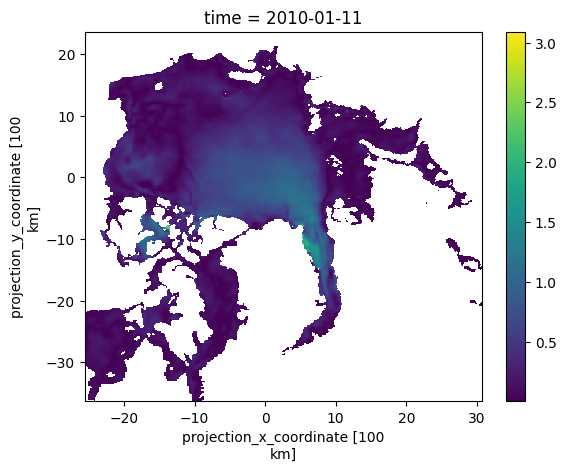

In [38]:
rmse_ml.isel(time=10).plot()

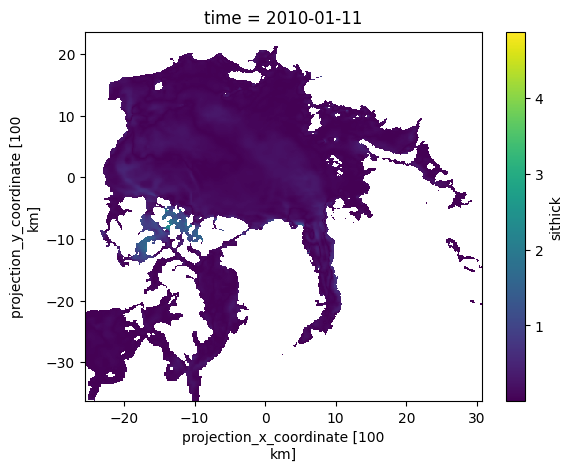

In [39]:
rmse_fr.isel(time=10).plot()

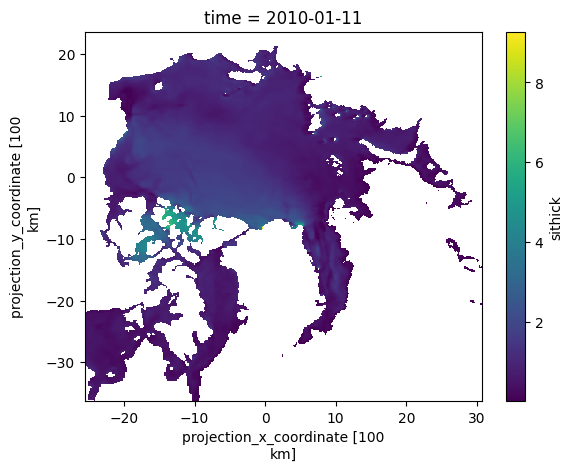

In [11]:
rmse_frl.isel(time=10).plot()

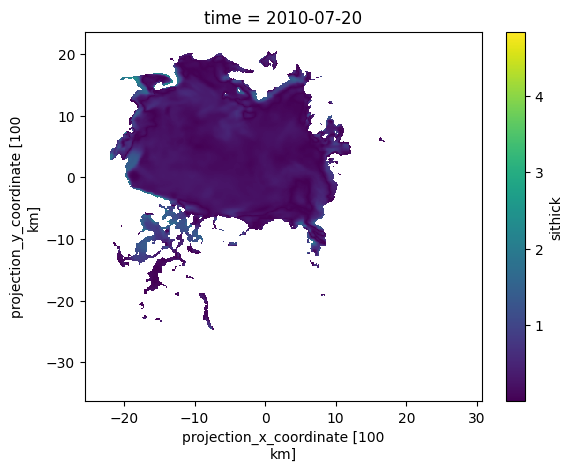

In [16]:
rmse_fr.isel(time=200).plot()

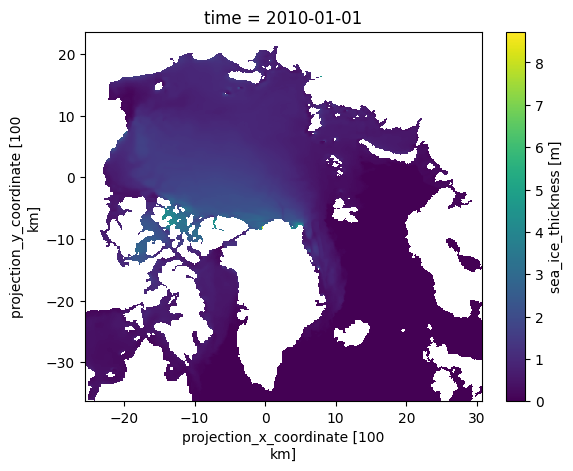

In [78]:
s1.sit_na.isel(time=0).plot()

In [13]:
s1.sit_a

<xarray.DataArray 'sithick' (time: 4748, y: 479, x: 450)>
[1023431400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
  * x          (x) float32 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * y          (y) float32 -36.25 -36.12 -36.0 -35.88 ... 23.12 23.25 23.38 23.5
Attributes:
    cell_methods:   area: mean where sea_ice
    grid_mapping:   stereographic
    standard_name:  sea_ice_thickness
    units:          m

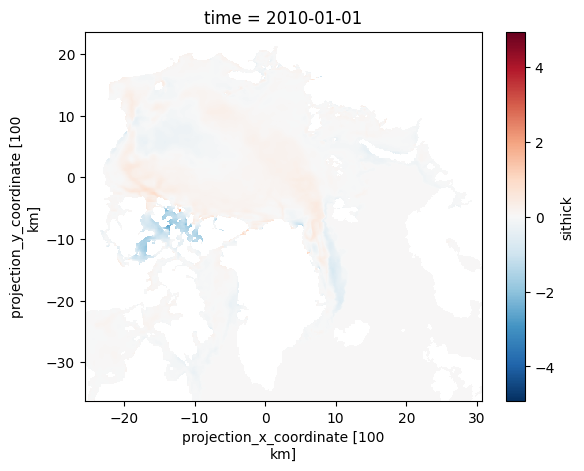

In [12]:
s1.Xe.isel(time=0).plot()

In [51]:
sit_pref = s1.sit_na + s1.Xe_rec

In [54]:
ss_ref = ((s1.sit.isel(time=slice(None,ntest)) - s1.sit_a.isel(time=slice(None,ntest))) / (sit_pref.isel(time=slice(None,ntest)) - s1.sit_a.isel(time=slice(None,ntest))) ) * 100

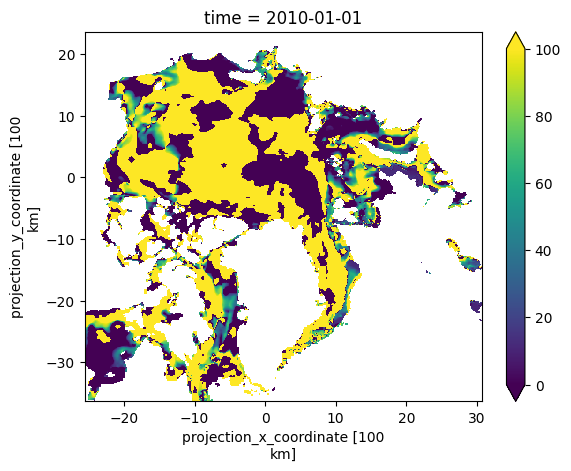

In [63]:
ss_ref.isel(time=0).plot(vmin=0, vmax=100)

In [24]:
# rmse machine learning compare to Truth (TOPAZ4b)
rmse_ml = np.sqrt(np.square(s1.Xc.isel(time=slice(None,ntest))-s1.Xe.isel(time=slice(None,ntest))))

In [7]:
# rmse freerun compare to Truth (TOPAZ4b)
rmse_fr = np.sqrt(np.square(s1.sit_na.isel(time=slice(None,ntest))-s1.Xe.isel(time=slice(None,ntest))))

In [99]:
mse_clim = np.square(s1.Xe.isel(time=slice(ntest, ntest+400))).mean(('x','y'))

In [100]:
mse_ml = np.square(s1.Xc.isel(time=slice(ntest, ntest+400))-s1.Xe.isel(time=slice(ntest, ntest+400))).mean(('x','y'))

In [101]:
ss_clim = 1 - (mse_ml / mse_clim)

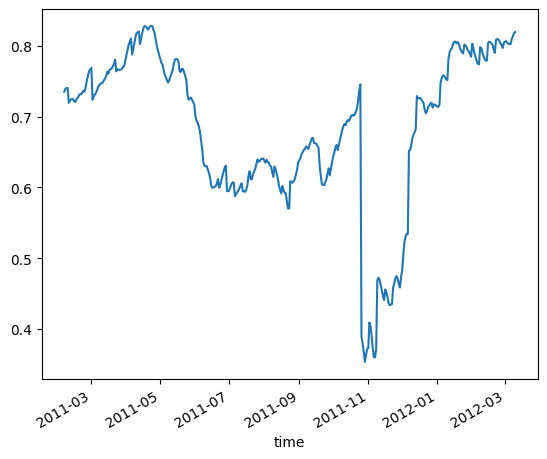

In [79]:
ss_clim.plot()

Text(0, 0.5, 'Skill score')

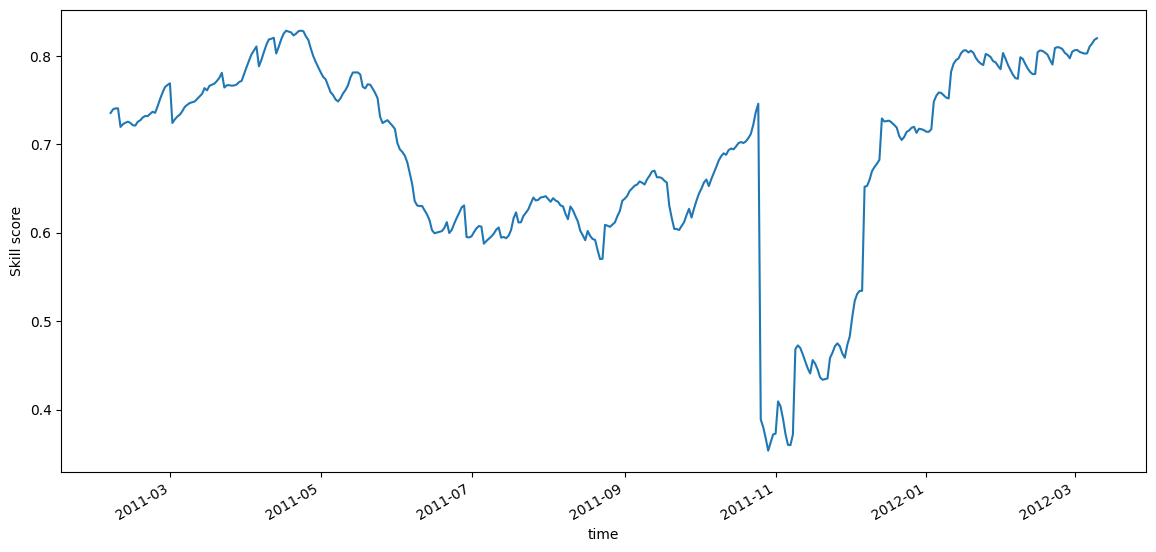

In [108]:
fig, ax = plt.subplots(ncols=1, figsize=(14,6))
    

ss_clim.plot()
ax.set_ylabel('Skill score')

In [110]:
mse_clim_xy = np.square(s1.Xe.isel(time=slice(ntest, ntest+400))).mean(('time'))

In [111]:
mse_ml_xy = np.square(s1.Xc.isel(time=slice(ntest, ntest+400))-s1.Xe.isel(time=slice(ntest, ntest+400))).mean(('time'))

In [112]:
ss_clim_xy = 1 - (mse_ml_xy / mse_clim_xy)

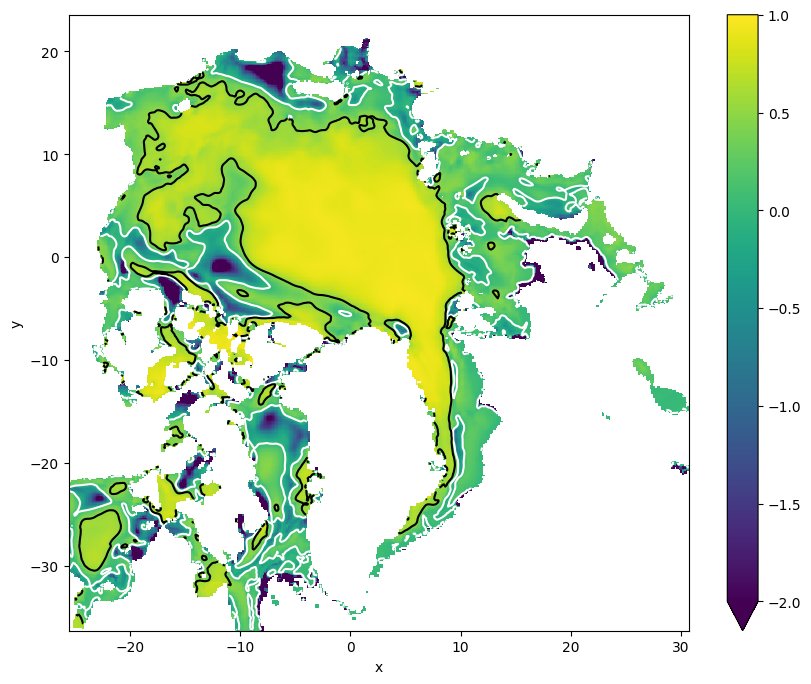

In [128]:
fig, ax = plt.subplots(ncols=1, figsize=(10,8))

levels = np.array([0, 0.5])

# ax.set_facecolor('grey')
ss_clim_xy.plot(vmin=-2, vmax=1, center=0) # cmap=plt.get_cmap('bwr'))
cl = ss_clim_xy.plot.contour(ax=ax, levels=levels, add_colorbar=False, cmap=plt.get_cmap('Greys'))


In [131]:
s1.ss_clim_xy = ss_clim_xy

In [133]:
s1.ss_clim_t = ss_clim

In [135]:
from importlib import reload

In [149]:
reload(vsc)

<module 'src.visualization.visualize_sit_corr' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_sit_corr.py'>

In [146]:
from src.visualization import visualize_sit_corr as vsc

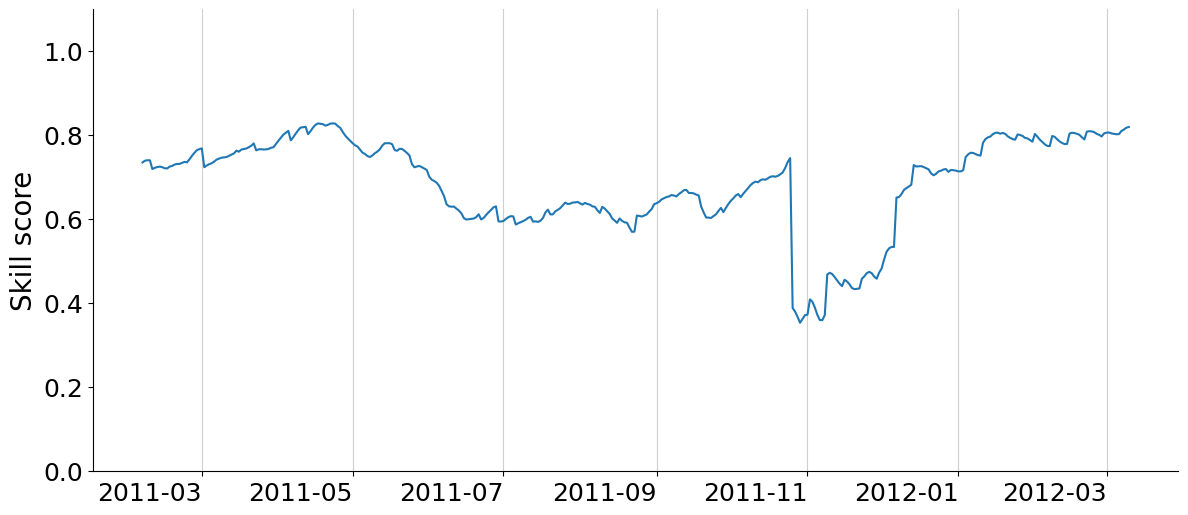

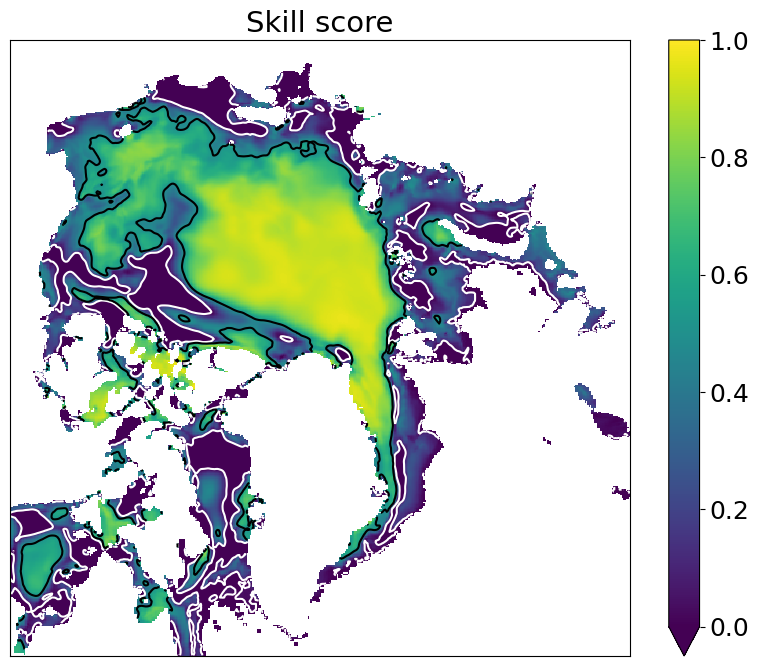

In [150]:
vsc.draw_improvement(s1, savefig=False, showfig=True)

In [40]:
sk = 1 - (rmse_ml / rmse_fr2)

In [64]:
sk2 = 1 - (rmse_ml / rmse_fr)

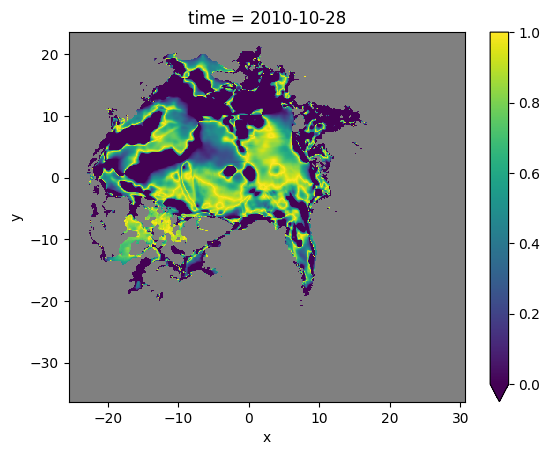

In [18]:
plt.gca().set_facecolor('grey')

sk.isel(time=300).plot(vmin=0, vmax=1)


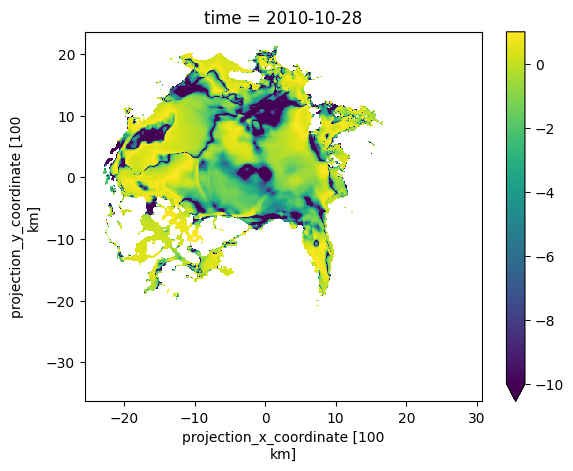

In [66]:
sk2.isel(time=300).plot(vmin=-10, vmax=1)

In [23]:
s1.Xc

<xarray.DataArray (time: 4704, y: 479, x: 450)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * y          (y) float64 -36.25 -36.12 -36.0 -35.88 ... 23.12 23.25 23.38 23.5
  * x          (x) float64 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-11-17
    latitude   (y, x) float32 51.68 51.74 51.8 51.85 ... 56.57 56.49 56.41 56.33
    longitude  (y, x) float32 -80.12 -79.99 -79.86 -79.73 ... 82.73 82.61 82.5

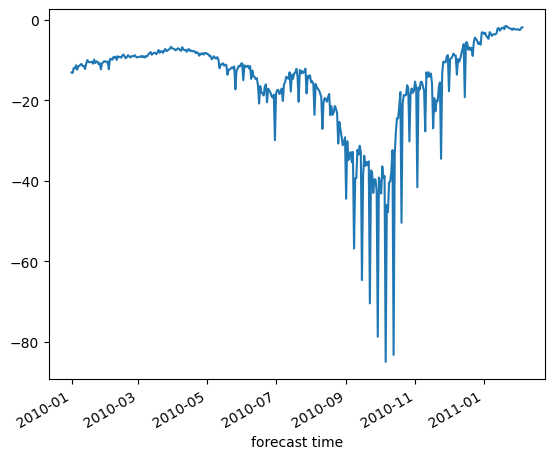

In [42]:
sk.where(sk>-5000).mean(('x','y')).plot()

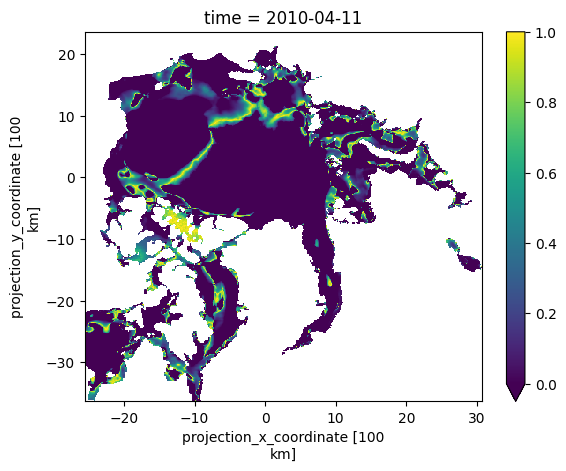

In [41]:
sk.isel(time=100).plot(vmin=0, vmax=1)

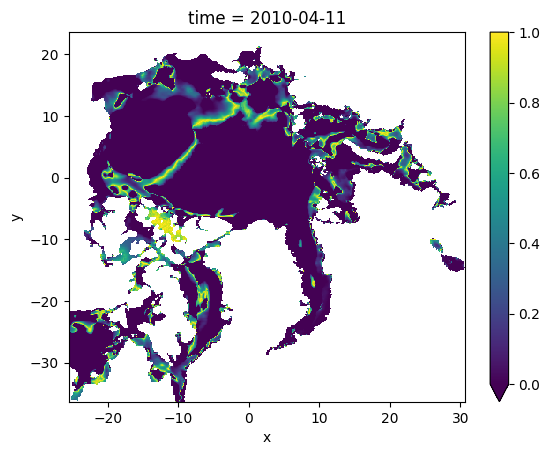

In [34]:
sk.isel(time=100).plot(vmin=0, vmax=1)

In [ ]:
sk.isel(time=300).plot(vmin=0, vmax=1)

In [29]:
# Draw

my_cmap = plt.get_cmap('plasma')
my_cmap.set_under('grey')
my_cmap.set_over('white')

landmask = s1.sit.isel(time=0)    

landmask_ = landmask.where(np.isnan(landmask),0)
landmask_ = landmask.where(~np.isnan(landmask),1)

# landmask_.plot(add_colorbar=True, vmin=0.1, vmax=.9, cmap=my_cmap)

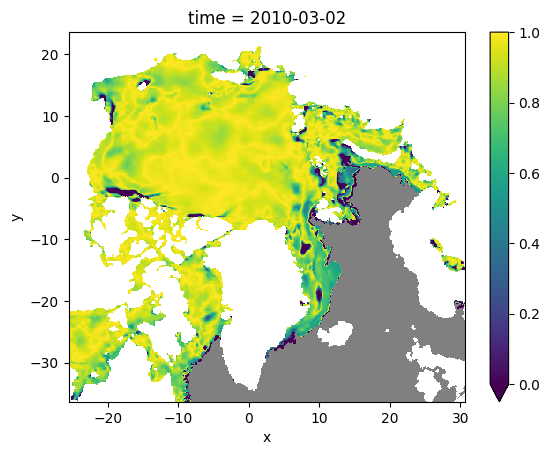

In [28]:
landmask.plot(add_colorbar=False, vmin=0.1, vmax=.9, cmap=my_cmap)
    
sk.isel(time=60).plot(vmin=0, vmax=1)

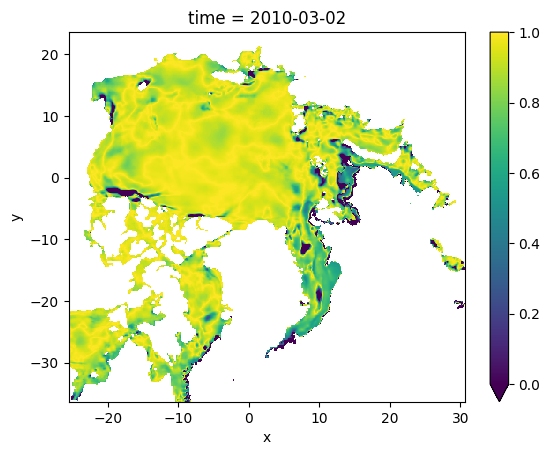

In [45]:
#landmask.plot(add_colorbar=False, vmin=0.1, vmax=.9, cmap=my_cmap)
    
sk.isel(time=60).plot(vmin=0, vmax=1)

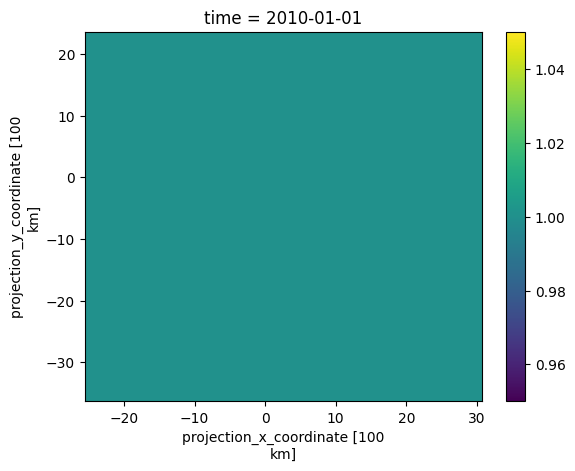

In [52]:
(landmask!=1).plot()

In [ ]:
# monthly average of skill score

In [30]:
# monthly average
skm = sk.resample(time='1M').mean(dim='time')

In [31]:
# cap negative value to 0
tr = skm.where(skm>=0, 0)

# put nan when there is not sea ice
trr = tr.where(landmask!=1)

# invalid skill score (-inf)
trrr = trr.where(skm!=-np.Inf, -1)

In [53]:
# cap negative value to 0
tr = sk.where(sk>=0, 0)

# put nan when there is not sea ice
# trr = tr.where(landmask!=1)

In [54]:
# invalid skill score (-inf)
trrr = tr.where(sk!=-np.Inf, -1)

In [56]:
trrr

<xarray.DataArray (y: 479, x: 450, time: 400)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * y          (y) float64 -36.25 -36.12 -36.0 -35.88 ... 23.12 23.25 23.38 23.5
  * x          (x) float64 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2011-02-04
    latitude   (y, x) float32 51.68 51.74 51.8 51.85 ... 56.57 56.49 56.41 56.33
    longitude  (y, x) float32 -80.12 -79.99 -79.86 -79.73 ... 82.73 82.61 82.5

In [149]:
my_cmap = plt.get_cmap('plasma')
my_cmap.set_under('grey')

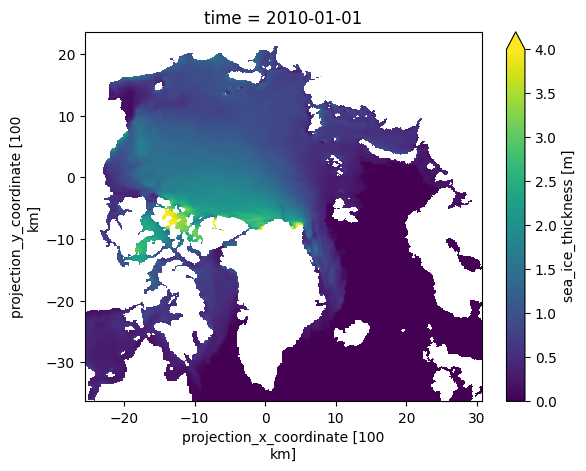

In [63]:
s1.sit_na.isel(time=0).plot(vmax=4)

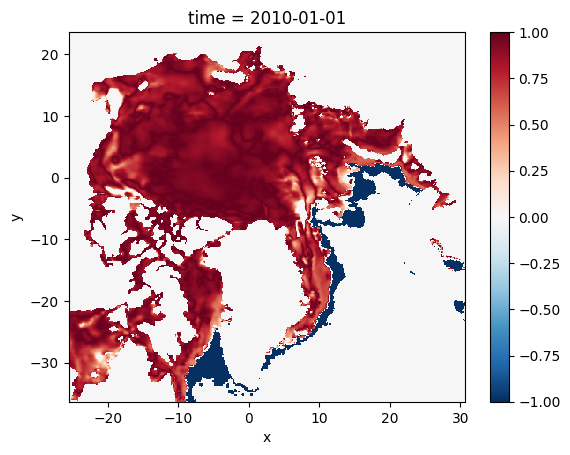

In [58]:
trrr.isel(time=0).plot()

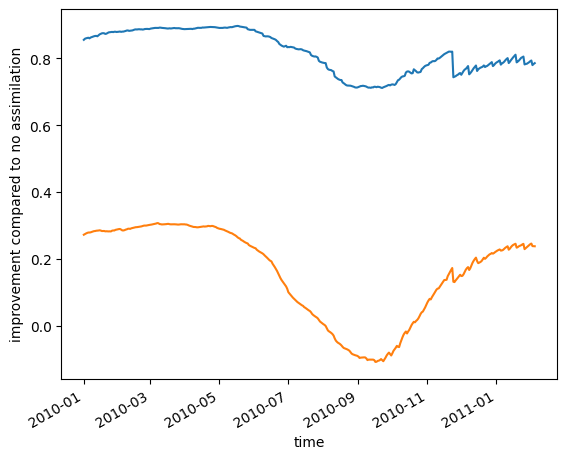

In [74]:
trrr.where(trrr>0.000).mean(dim=('x','y')).plot()
trrr.where(trrr>=-1).mean(dim=('x','y')).plot()

plt.ylabel('improvement compared to no assimilation');

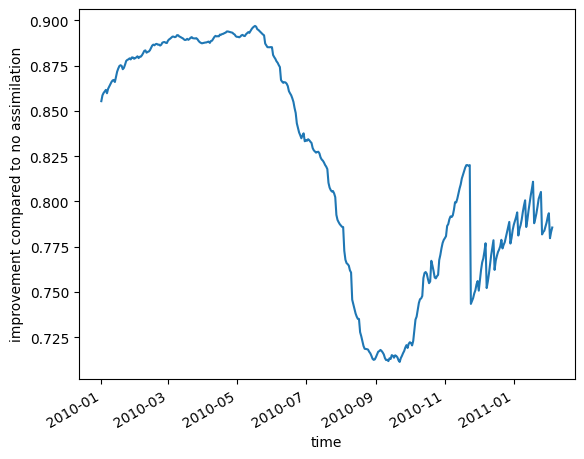

In [50]:
trrr.where(trrr>0.001).mean(dim=('x','y')).plot()
plt.ylabel('improvement compared to no assimilation');

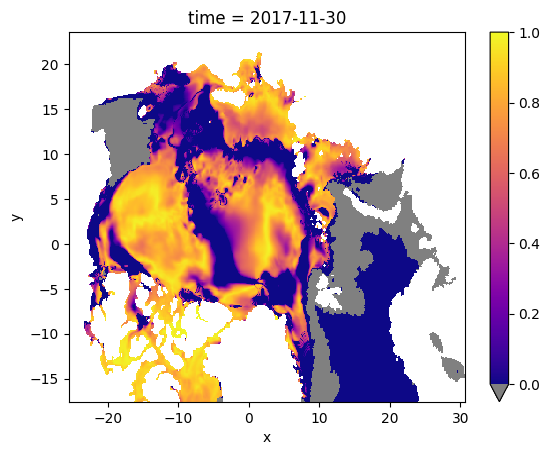

In [195]:
trrr.isel(time=73).plot(vmin=0, vmax=1, cmap=my_cmap)

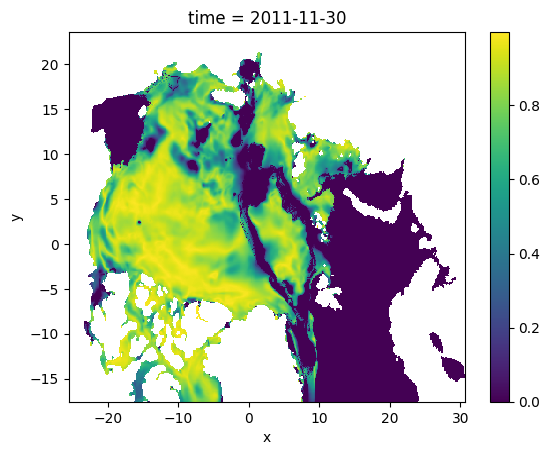

In [154]:
trr.isel(time=1).plot()

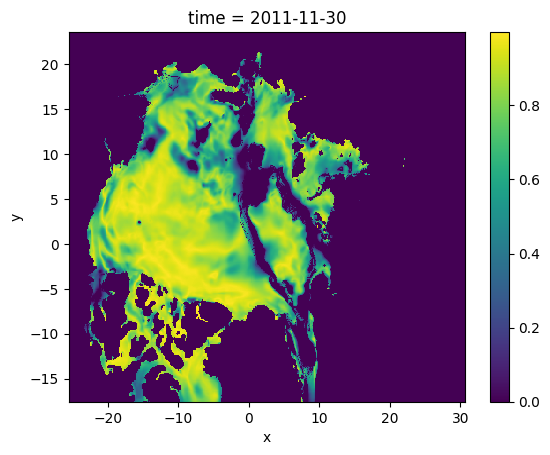

In [153]:
tr.isel(time=1).plot()

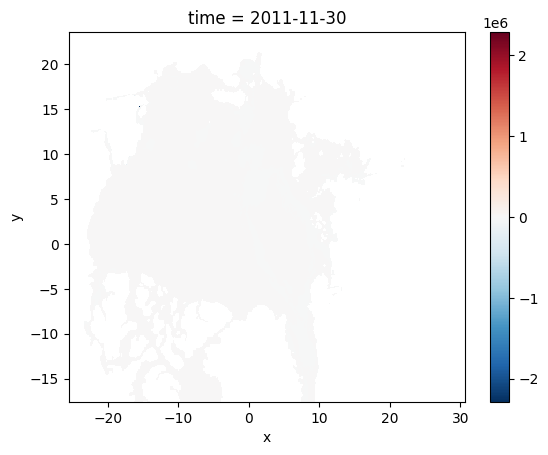

In [102]:
skm.isel(time=1).plot()

In [90]:
np.nanmean(skm, axis=(0,1))

array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf])

---------------------------

In [1]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import yaml
import pickle as pkl
import datetime

from src.data_preparation import mdl_dataset_prep as dataset_prep

import src.utils.load_config as load_config
import src.data_preparation.load_data as load_data
from src.feature_extraction import extract_pca

import src.visualization.visualize_pca as visualize_pca
from src.visualization import visualize_sit_corr as vsc
from src.utils import modif_plot
from src.feature_extraction import baseline
from src.modelling import sit_corrected

import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [133]:
from importlib import reload
reload(vsc);

## Retrieving results from ML

In [1]:
# try with AK model
irootdir= '/cluster/work/users/leoede/'
ipath = 'Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/'
iname = 'ypred_AK_100_0.npy'

file_config = f'{irootdir}{ipath}data_proc_full.yaml'

In [7]:
# get ml_dir and target_field
nosit_dir, withsit_dir, _, forcing_bdir, pca_dir, res_dir, fig_dir, ml_dir, _ = load_config.load_filename(file_config, verbose=True)
timeofday, target_field, forcing_fields, covar_fields, lim_idm, lim_jdm, n_comp = load_config.load_config_params(file_config)

In [152]:
ifile = f'{irootdir}{ml_dir}{iname}'

In [153]:
ifile

'/cluster/work/users/leoede/Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/ml/ypred_AK_100_0.npy'

In [9]:
ml_dir

'Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/ml/'

In [10]:
file_config

'/cluster/work/users/leoede/Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/data_proc_full.yaml'

In [16]:
# create new directory to save new results
sit_rec_dir = f'{fig_dir}sit_reconstruct/'

In [17]:
sit_rec_dir

'Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/figures/sit_reconstruct/'

In [18]:
if not os.path.exists(f'{irootdir}{sit_rec_dir}'):
    os.mkdir(f'{irootdir}{sit_rec_dir}') 

---------

In [5]:
irootdir= '/cluster/work/users/leoede/'
ipath = 'Leo/results/rf_221216-141433/'
ml_name = 'RF'

In [6]:
ifile = f'{irootdir}{ipath}'

### Reconstruct values 

In [37]:
from importlib import reload

In [85]:
reload(sit_corrected)

<module 'src.modelling.sit_corrected' from '/cluster/home/leoede/tardis/tardis-ml/src/modelling/sit_corrected.py'>

In [75]:
ifile

'/cluster/work/users/leoede/Leo/results/rf_221216-141433/'

In [86]:
s1 = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

Config file found: /cluster/work/users/leoede/Leo/results/rf_221216-141433/data_proc_full.yaml
Old config files, some <ml> parameters are not imported.
Old config files, <dataset> parameters are not imported.
Folder: Leo/results/rf_221216-141433/figures/sit_reconstruct/

Initialisation SIT from RF
ML prediction .nc file found: /cluster/work/users/leoede/Leo/results/rf_221216-141433/ml/ypred_rf.nc


In [87]:
s1.reconstruct_sit()

Ypred is NOT reversed !
todo: get ntest from config file or results file
Old config, variable <ntest> not found


In [83]:
s1.compute_rmse()
s1.compute_bias()
s1.compute_mean()

Size of the test:600
Average of the corrected model error: 0.29
Average of the model error reconstruction (lower bound): 0.19
Average of the baseline error correction (fair upper bound): 0.35


In [88]:
s1.save_sit()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/cluster/home/leoede/.conda/envs/tardis-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_21915/2540228075.py", line 1, in <cell line: 1>
    s1.save_sit()
  File "/cluster/home/leoede/tardis/tardis-ml/src/modelling/sit_corrected.py", line 310, in save_sit
    print(f'Saved as: {odir}{ofile}')
NameError: name 'ofile' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/cluster/home/leoede/.conda/envs/tardis-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/cluster/home/leoede/.conda/envs/tardis-env/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/cluster/home

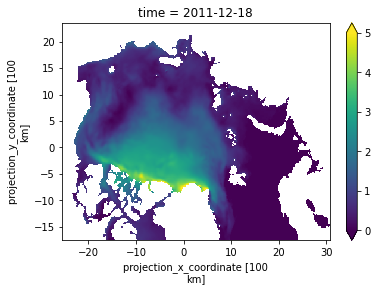

In [51]:
s1.sit[48+30].plot(vmin=0, vmax=5)

-----

# Show reconstructed sea-ice thickness

## RMSE

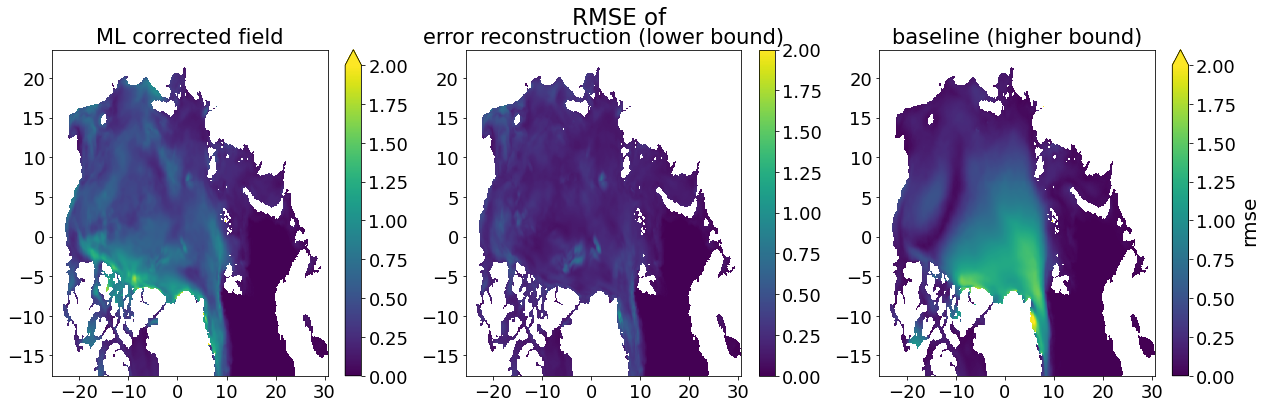

In [112]:
vsc.draw_rmse(s1)

## Bias

In [90]:
day = datetime.datetime(2013,2,15)

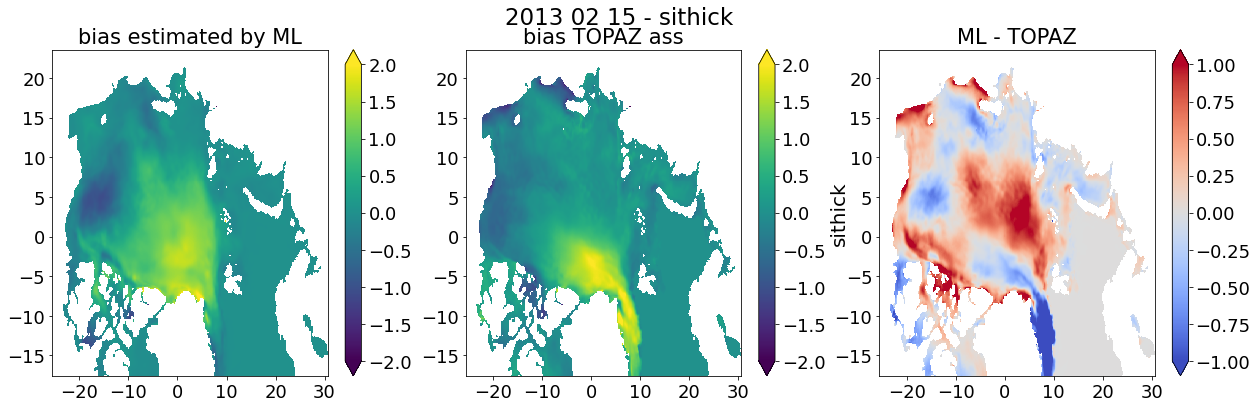

In [146]:
vsc.draw_bias_diff(s1, day=day, target_field='sithick', rootdir=s1.rootdir, fig_dir=fig_dir, savefig=False, showfig=True)

## RMSE and bias on time series

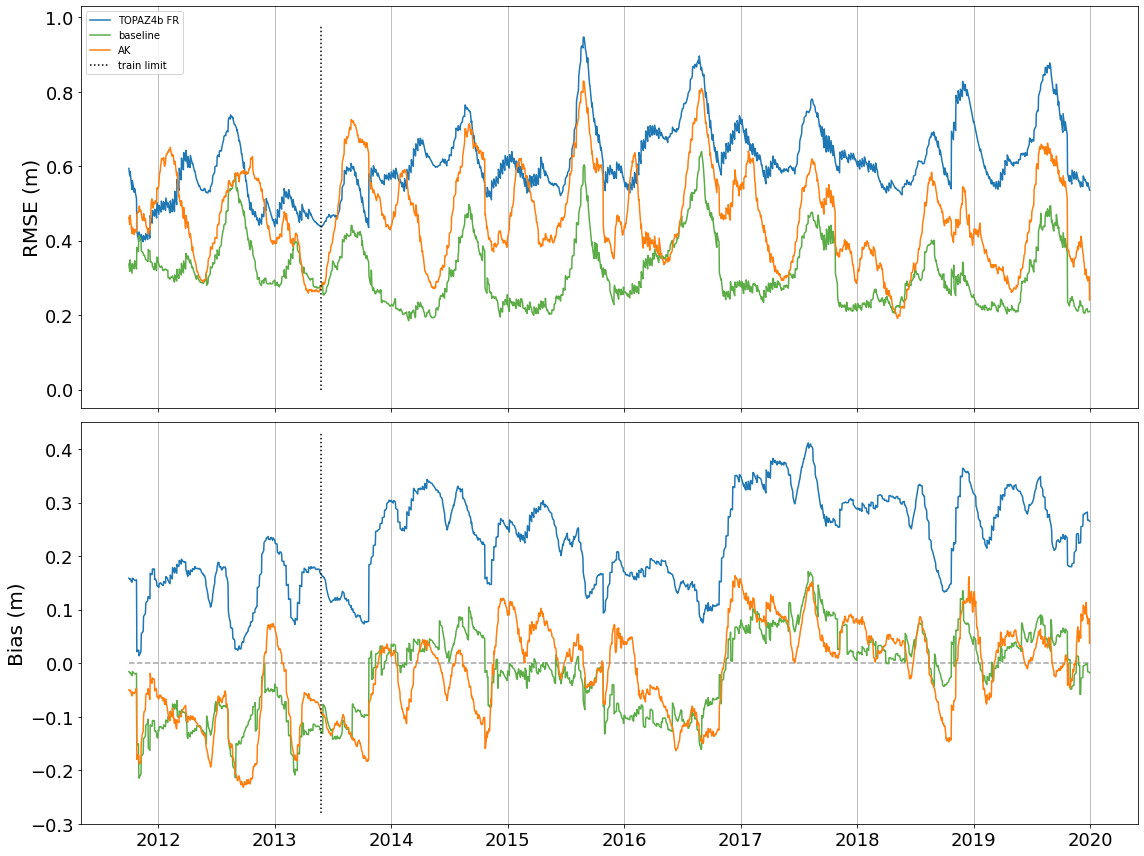

In [104]:
vsc.draw_rmse_bias(s1, savefig=False, showfig=True)

## SIT temporal reconstruction

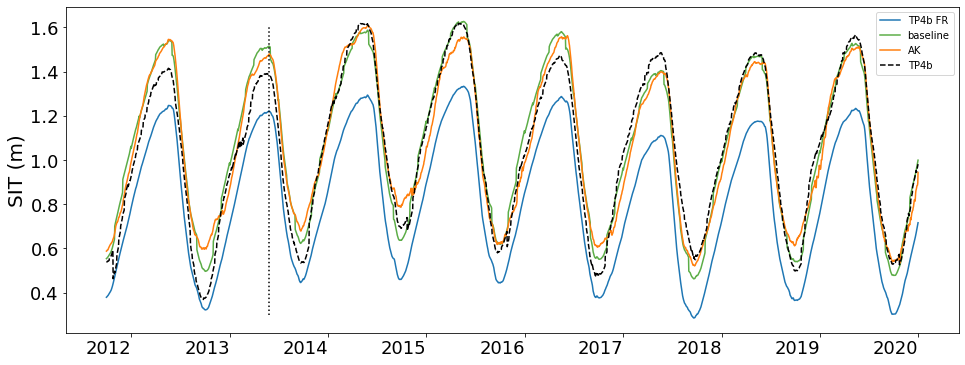

In [109]:
vsc.draw_sit(s1, showfig=True)

## SIT spatial reconstruction


In [53]:
sit_rec_dir

'Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/figures/sit_reconstruct/'

In [56]:
day = datetime.datetime(2012,1,1)

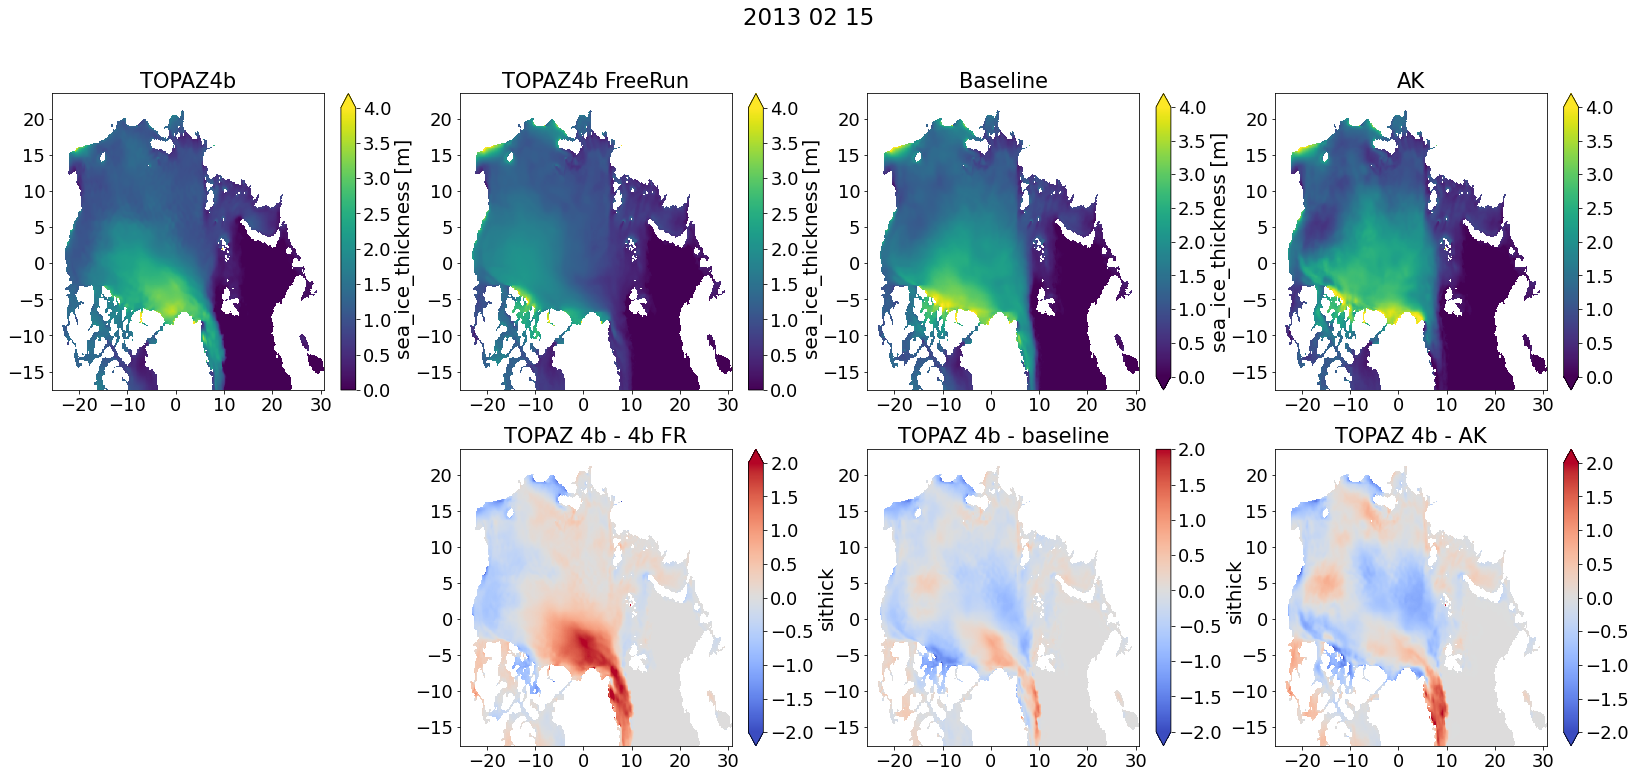

In [144]:
vsc.spatial_reconstruct(s1, day, showfig=True, savefig=False, rootdir=rootdir, fig_dir=sit_rec_dir)

In [117]:
d1 = datetime.datetime(2011,10,1)
d2 = datetime.datetime(2014,10,1)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])

In [145]:
# odir = 'Leo/results/spatial_reconstruct/figures/'
# odir = sit_rec_dir
vsc.spat_reco_save_all(s1, all_days[:2], irootdir, fig_dir=sit_rec_dir)

Saved as : /cluster/work/users/leoede/Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/figures/sit_reconstruct/SIT_RF_20111001.png
Saved as : /cluster/work/users/leoede/Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221114-165625/figures/sit_reconstruct/SIT_RF_20111002.png


-----

-----

## mean temporal bias on each gridpoint

In [133]:
from importlib import reload
reload(vsc);

In [143]:
from src.utils import modif_plot
reload(modif_plot);

In [241]:
gbias_rc =  (s1.sit_a.isel(time=slice(None,ntest)) - s1.sit.isel(time=slice(None,ntest)))

In [243]:
he = gbias_rc.mean(dim=('time'))

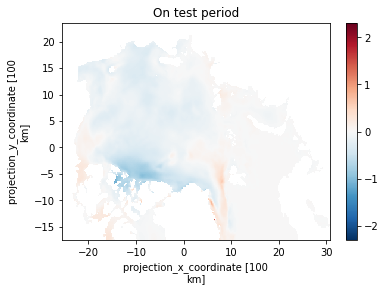

In [244]:
he.plot()
plt.title('On test period');

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.75290563, -1.30059427, -0.8482829 , -0.39597153,  0.05633984,
         0.50865121,  0.96096258,  1.41327395,  1.86558532,  2.31789669,
         2.77020806]),
 <a list of 450 BarContainer objects>)

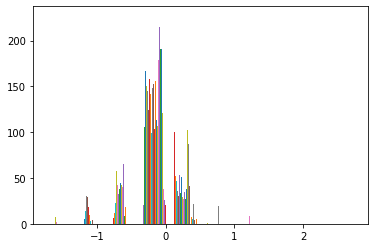

In [253]:
plt.hist(gbias_rc[100])

-----